<a href="https://colab.research.google.com/github/arielmeragelman/analisis_volatilidad_precios/blob/main/convertir_sql_en_data_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyMySQL



In [ ]:
#DEFINO LOS DATOS PARA LA CONEXION CON LA BASE DE DATO DONDE SE GUARDA LA INFORMACION DEL SCRAPPING

import pymysql 
import pandas as pd


link=pymysql.connect(
   host="192.168.0.116",    
   user="laboratorio", 
   password="laboratorio",
   db="bd_1", 
   charset="utf8",
   port=3306
   )


#DEFINO LA CONSULTA PARA LEER LA INFORMACION DE LA BASE DE DATOS


def consulta_lineas(sql,link):
  
    cursor = link.cursor()
    cursor.execute(sql)
    print(cursor.rowcount, "LECTURA CORRECTA")
    salida=[]
    for row in cursor.fetchall():
        print(row)
        salida.append(row)
    cursor.close()
    return salida


In [ ]:

#EJECUTO UNA CONSULTA MODELO PARA EL ANALISIS DE DATOS
sql = """select distinct N_Producto,Precio_Origen,FECHA from entradas_super where N_Producto like "%QUESO%" and N_Super = "SUPER MAMI" order by N_Producto,Fecha ASC  """
#OBTENGO UNA LISTA CON LAS SALIDAS DE LA QUERY
tabla=consulta_lineas(sql,link)

2855 LECTURA CORRECTA
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 18))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 19))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 21))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 22))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 24))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 25))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 26))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 27))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 28))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 30))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datet

In [ ]:
tabla

[('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 18)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 19)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 21)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 22)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 24)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 25)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 26)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 27)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 28)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 30)),
 ('HARINA DE MAIZ PRESTOPRONTA

In [ ]:
# CONVIERTO LA LISTA EN UN DATAFRAME
a= pd.DataFrame(tabla)


# DEFINO DOS ARREGLOS UNIDIMENCIONALES CON LAS FECHAS Y LOS PRODUCTOS SIN QUE SE REPITAN
nuevas_columnas=a[0].unique()
fechas= a[2].unique()


# CREO UNA MATRIZ QUE OBTIENE LOS VALORES DE LA "tabla"  PERO LOS ORDENA PONIENDO CADA ELEMENTO DE FORMA UNICA E IRREPETIBLE SEGUN EL NOMBRE DEL PRODUCTO Y LA FECHA
# QUEDANDO LA FECHA COMO INDICE DE FILAS Y LOS PRODUCTOS COMO INDICE DE COLUMNAS

matriz_nueva=[]
for j,dia in enumerate(fechas):
    matriz_nueva.append([])
    for i,columna in enumerate(nuevas_columnas):
            try:
                valor=   float(a[ (a[0]==columna) & (a[2]==dia) ][1] )
            except TypeError:
                    valor=   0
            
            print("En la posicion i:"+str(i)+", j: "+str(j)+" Tenemos el valor: "+str(valor))
            matriz_nueva[j].append(valor)
            



En la posicion i:0, j: 0 Tenemos el valor: 102.96
En la posicion i:1, j: 0 Tenemos el valor: 61.36
En la posicion i:2, j: 0 Tenemos el valor: 366.76
En la posicion i:3, j: 0 Tenemos el valor: 155.9
En la posicion i:4, j: 0 Tenemos el valor: 205.82
En la posicion i:5, j: 0 Tenemos el valor: 155.9
En la posicion i:6, j: 0 Tenemos el valor: 155.9
En la posicion i:7, j: 0 Tenemos el valor: 205.82
En la posicion i:8, j: 0 Tenemos el valor: 155.9
En la posicion i:9, j: 0 Tenemos el valor: 0
En la posicion i:10, j: 0 Tenemos el valor: 1.0
En la posicion i:11, j: 0 Tenemos el valor: 1.0
En la posicion i:12, j: 0 Tenemos el valor: 302.54
En la posicion i:13, j: 0 Tenemos el valor: 1.0
En la posicion i:14, j: 0 Tenemos el valor: 1.0
En la posicion i:15, j: 0 Tenemos el valor: 0
En la posicion i:16, j: 0 Tenemos el valor: 810.9
En la posicion i:17, j: 0 Tenemos el valor: 737.9
En la posicion i:18, j: 0 Tenemos el valor: 0
En la posicion i:19, j: 0 Tenemos el valor: 787.9
En la posicion i:20, j: 0

In [ ]:
#CONVIERTO A LA MATRIZ EN UN DATAFRAME
matriz_nueva=pd.DataFrame(matriz_nueva)
#DEFINO EL NOMBRE DE LAS COLUMNAS
matriz_nueva.columns=nuevas_columnas
#DEFINO LOS INDICES DE FILAS
matriz_nueva.index=fechas
#DEFINO EL NOMBRE DEL INDICE DE FILA
matriz_nueva.index.name="fechas"

In [ ]:
print(matriz_nueva.head())
print("---"*10)
print(matriz_nueva.index)

            HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
fechas                                                           
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
fechas                                                           
2022-04-18                                              61.36    
2022-04-19                                              61.36    
2022-04-21                                              61.36    
2022-04-22                                              61.36    
2022-04-24                                              61.36    

            PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
fechas        

In [ ]:
matriz_nueva.describe()

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
count                                          48.000000    
mean                                          101.270000    
std                                            21.812719    
min                                             0.000000    
25%                                           102.960000    
50%                                           102.960000    
75%                                           105.560000    
max                                           113.360000    

       HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
count                                          48.000000    
mean                                           58.283333    
std                                            12.314715    
min                                             0.000000    
25%                                            59.280000    
50%                                            61.360000    
75%                                            61.360000    
max                                            61.360000    

       PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
count                                     48.000000   
mean                                     341.799167   
std                                       99.365615   
min                                        0.000000   
25%                                      336.570000   
50%                                      366.760000   
75%                                      384.010000   
max                                      435.760000   

       QUESO ADLER AZUL X 100 GR.  QUESO ADLER FONTINA RUEDA X 120 GR.  \
count                   48.000000                            48.000000   
mean                   143.912500                           143.502917   
std                     50.070336                            97.993901   
min                      0.000000                             0.000000   
25%                    155.900000                             0.000000   
50%                    155.900000                           205.820000   
75%                    171.600000                           205.820000   
max                    171.600000                           229.840000   

       QUESO ADLER FONTINA X 100 GR.  QUESO ADLER GRUYERE X 100 GR.  \
count                      48.000000                      48.000000   
mean                      158.539583                     139.052083   
std                        24.584719                      58.518151   
min                         0.000000                       0.000000   
25%                       155.900000                     155.900000   
50%                       155.900000                     155.900000   
75%                       171.600000                     171.600000   
max                       171.600000                     171.600000   

       QUESO ADLER JAMON RUEDA X 120 GR.  QUESO ADLER JAMON X 100 GR.  \
count                          48.000000                    48.000000   
mean                          124.565417                    83.183333   
std                           106.742815                    84.229806   
min                             0.000000                     0.000000   
25%                             0.000000                     0.000000   
50%                           205.820000                    77.950000   
75%                           205.820000                   171.600000   
max                           229.840000                   171.600000   

       QUESO ADLER SALAME X 100 GR.  ...  QUESO TREGAR AZUL HORMA X KG.  \
count                     48.000000  ...                      48.000000   
mean                      52.643750  ...                       0.958333   
std                       78.989315  ...                       0.201941   
min                        0.000000  ...                       0.000000   
25%                        0.000000  ...                       1.000000

In [ ]:
# OBTENGO 2 DATAFRAME CON LOS VALORES HISTORICOS DEL DOLAR EN ARGENTINA

import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd

def scrap(año, mes, url):
    
    
    
    for i in range(1,7):
        try:        
            fecha = datetime.datetime(año,mes,i)
            data = {'fecha': fecha.strftime('%d-%m-%y')}
            resp = requests.post(url, data=data)
            soup = BeautifulSoup(resp.text, "html.parser")
            break
        except:
            print('Falló en ',i)    
    filas = soup.find_all('td', {'style' : 'padding: 1%'})
    return filas

def parsear(filas):
    mensual = pd.DataFrame() 
    for i in range(1, int(len(list(filas))/3)):
        dic = {}
        dic['fecha'] = filas[3*i].text
        dic['bid'] = filas[3*i+1].text
        dic['ask'] = filas[3*i+2].text
        rueda = pd.DataFrame.from_dict(dic, orient='index').transpose().set_index('fecha')
        rueda.index = pd.to_datetime(rueda.index, format='%d-%m-%y ')
        mensual = pd.concat([mensual,rueda], axis=0)
    return mensual

def downloadAño(año,url):
    tablaAnual = pd.DataFrame()
    for i in range(1,13):
        filas = scrap(año=año, mes=i,url=url)
        tabla = parsear(filas)
        tablaAnual = pd.concat([tablaAnual,tabla],axis=0)
        print('mes',i,'listo')        
    tablaAnual.to_excel('blue_'+str(año)+'.xlsx')
    print(tablaAnual)
    return tablaAnual


año=2022

dolar_blue= downloadAño(año,'https://www.cotizacion-dolar.com.ar/dolar-blue-historico-'+str(año)+'.php')
dolar_oficial= downloadAño(año,'https://www.cotizacion-dolar.com.ar/dolar-historico-bna-'+str(año)+'.php')

dolar=pd.merge(dolar_blue, dolar_oficial, on='fecha')

mes 1 listo
mes 2 listo
mes 3 listo
mes 4 listo
mes 5 listo
mes 6 listo
mes 7 listo
mes 8 listo
mes 9 listo
mes 10 listo
mes 11 listo
mes 12 listo
                   bid        ask
fecha                            
2022-01-03   $ 202.40    $ 206.00
2022-01-04   $ 202.90    $ 206.50
2022-01-05   $ 203.90    $ 207.50
2022-01-06   $ 204.90    $ 208.50
2022-01-07   $ 204.40    $ 208.00
...                ...        ...
2022-07-06   $ 247.00    $ 255.00
2022-07-07   $ 249.00    $ 257.00
2022-07-08   $ 265.00    $ 273.00
2022-07-11   $ 260.00    $ 268.00
2022-07-12   $ 264.00    $ 272.00

[130 rows x 2 columns]
mes 1 listo
mes 2 listo
mes 3 listo
mes 4 listo
mes 5 listo
mes 6 listo
mes 7 listo
mes 8 listo
mes 9 listo
mes 10 listo
mes 11 listo
mes 12 listo
                   bid        ask
fecha                            
2022-01-03   $ 102.00    $ 108.00
2022-01-04   $ 102.00    $ 108.00
2022-01-05   $ 102.00    $ 108.00
2022-01-06   $ 102.25    $ 108.25
2022-01-07   $ 102.50    $ 108.50
..

In [ ]:
# Cambio el formato del index de la matriz obtenida por web scrapping para que el indice sea en formato datetime y poder unirlo con la matriz del precio del dolar
matriz_nueva.index = pd.to_datetime(matriz_nueva.index)

matriz_con_dolar=pd.merge(matriz_nueva, dolar, left_index=True, right_index=True, how='left')


In [ ]:


# CONVIERTO LOS OBJETOS EN VALORES FLOTANTES PARA PODER COMPARAR LA VARIACION

for i in matriz_con_dolar.columns:
       if matriz_con_dolar[i].dtype == 'O':
            try:
                matriz_con_dolar[i]=matriz_con_dolar[i].str.strip('$ ').astype(float)
            except:
                passmatriz_con_dolar

In [ ]:


# COMENZAMOS CON LA LIMPIEZA DE VALORES IRRACIONALES
# CONVERTIMOS TODOS LOS PRECIOS INFERIORES A $2 EN NAN

import numpy as np

for i in range(len(nuevas_columnas)):
   
    indice=nuevas_columnas[i]
    matriz_con_dolar.loc[  matriz_con_dolar[indice] < 10, indice    ] = np.nan
matriz_con_dolar



HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
fechas                                                           
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    
2022-04-25                                             102.96    
2022-04-26                                             102.96    
2022-04-27                                             102.96    
2022-04-28                                             102.96    
2022-04-30                                             102.96    
2022-05-01                                             102.96    
2022-05-02                                             102.96    
2022-05-05                                             102.96    
2022-05-07                                             102.96    
2022-05-12                                             102.96    
2022-05-13                                             102.96    
2022-05-14                                             102.96    
2022-05-15                                             102.96    
2022-05-16                                             102.96    
2022-05-17                                             102.96    
2022-05-20                                             102.96    
2022-05-21                                             102.96    
2022-05-23                                             102.96    
2022-05-24                                             102.96    
2022-05-25                                             102.96    
2022-05-26                                             102.96    
2022-05-27                                             102.96    
2022-06-01                                             102.96    
2022-06-02                                             102.96    
2022-06-03                                             102.96    
2022-06-04                                             102.96    
2022-06-05                                             102.96    
2022-06-06                                             102.96    
2022-06-08                                             102.96    
2022-06-10                                             113.36    
2022-06-11                                             113.36    
2022-06-14                                             113.36    
2022-06-17                                             113.36    
2022-06-18                                             113.36    
2022-06-20                                             113.36    
2022-06-24                                             113.36    
2022-06-28                                             113.36    
2022-06-30                                             113.36    
2022-07-01                                             113.36    
2022-07-02                                             113.36    
2022-07-04                                             113.36    
2022-07-06                                             113.36    
2022-07-07                                             113.36    
2022-07-08                                             113.36    
2022-07-09                                             113.36    
2022-07-10                                             113.36    
2022-07-12                                             113.36    
2022-04-12                                                NaN    
2022-04-13                                                NaN    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
fechas                                                           
2022-04-18                                              61.36    
2022-04-19                                              61.36    
2022-04-21                                         

In [ ]:
# COMPLETAMOS CON DATOS LOS CAMPOS VACIOS
matriz_con_dolar=matriz_con_dolar.fillna(method="ffill")
matriz_con_dolar=matriz_con_dolar.fillna(method="backfill")
matriz_con_dolar

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
fechas                                                           
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    
2022-04-25                                             102.96    
2022-04-26                                             102.96    
2022-04-27                                             102.96    
2022-04-28                                             102.96    
2022-04-30                                             102.96    
2022-05-01                                             102.96    
2022-05-02                                             102.96    
2022-05-05                                             102.96    
2022-05-07                                             102.96    
2022-05-12                                             102.96    
2022-05-13                                             102.96    
2022-05-14                                             102.96    
2022-05-15                                             102.96    
2022-05-16                                             102.96    
2022-05-17                                             102.96    
2022-05-20                                             102.96    
2022-05-21                                             102.96    
2022-05-23                                             102.96    
2022-05-24                                             102.96    
2022-05-25                                             102.96    
2022-05-26                                             102.96    
2022-05-27                                             102.96    
2022-06-01                                             102.96    
2022-06-02                                             102.96    
2022-06-03                                             102.96    
2022-06-04                                             102.96    
2022-06-05                                             102.96    
2022-06-06                                             102.96    
2022-06-08                                             102.96    
2022-06-10                                             113.36    
2022-06-11                                             113.36    
2022-06-14                                             113.36    
2022-06-17                                             113.36    
2022-06-18                                             113.36    
2022-06-20                                             113.36    
2022-06-24                                             113.36    
2022-06-28                                             113.36    
2022-06-30                                             113.36    
2022-07-01                                             113.36    
2022-07-02                                             113.36    
2022-07-04                                             113.36    
2022-07-06                                             113.36    
2022-07-07                                             113.36    
2022-07-08                                             113.36    
2022-07-09                                             113.36    
2022-07-10                                             113.36    
2022-07-12                                             113.36    
2022-04-12                                             113.36    
2022-04-13                                             113.36    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
fechas                                                           
2022-04-18                                              61.36    
2022-04-19                                              61.36    
2022-04-21                                         

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
fechas                                                           
2022-04-12                                             113.36    
2022-04-13                                             113.36    
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    
2022-04-25                                             102.96    
2022-04-26                                             102.96    
2022-04-27                                             102.96    
2022-04-28                                             102.96    
2022-04-30                                             102.96    
2022-05-01                                             102.96    
2022-05-02                                             102.96    
2022-05-05                                             102.96    
2022-05-07                                             102.96    
2022-05-12                                             102.96    
2022-05-13                                             102.96    
2022-05-14                                             102.96    
2022-05-15                                             102.96    
2022-05-16                                             102.96    
2022-05-17                                             102.96    
2022-05-20                                             102.96    
2022-05-21                                             102.96    
2022-05-23                                             102.96    
2022-05-24                                             102.96    
2022-05-25                                             102.96    
2022-05-26                                             102.96    
2022-05-27                                             102.96    
2022-06-01                                             102.96    
2022-06-02                                             102.96    
2022-06-03                                             102.96    
2022-06-04                                             102.96    
2022-06-05                                             102.96    
2022-06-06                                             102.96    
2022-06-08                                             102.96    
2022-06-10                                             113.36    
2022-06-11                                             113.36    
2022-06-14                                             113.36    
2022-06-17                                             113.36    
2022-06-18                                             113.36    
2022-06-20                                             113.36    
2022-06-24                                             113.36    
2022-06-28                                             113.36    
2022-06-30                                             113.36    
2022-07-01                                             113.36    
2022-07-02                                             113.36    
2022-07-04                                             113.36    
2022-07-06                                             113.36    
2022-07-07                                             113.36    
2022-07-08                                             113.36    
2022-07-09                                             113.36    
2022-07-10                                             113.36    
2022-07-12                                             113.36    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
fechas                                                           
2022-04-12                                              59.28    
2022-04-13                                              59.28    
2022-04-18                                         

In [ ]:
# Controlamos que no queden columnas con valores inferiores a $10 , tomamos ese valor como referencia por los valores actuales de los productos de interes


matriz_con_dolar['indicator'] = matriz_con_dolar[matriz_con_dolar.columns].le(10).any(axis=1)
matriz_con_dolar['indicator']
matriz_con_dolar.drop('indicator',axis=1)

fechas
2022-04-12    False
2022-04-13    False
2022-04-18    False
2022-04-19    False
2022-04-21    False
2022-04-22    False
2022-04-24    False
2022-04-25    False
2022-04-26    False
2022-04-27    False
2022-04-28    False
2022-04-30    False
2022-05-01    False
2022-05-02    False
2022-05-05    False
2022-05-07    False
2022-05-12    False
2022-05-13    False
2022-05-14    False
2022-05-15    False
2022-05-16    False
2022-05-17    False
2022-05-20    False
2022-05-21    False
2022-05-23    False
2022-05-24    False
2022-05-25    False
2022-05-26    False
2022-05-27    False
2022-06-01    False
2022-06-02    False
2022-06-03    False
2022-06-04    False
2022-06-05    False
2022-06-06    False
2022-06-08    False
2022-06-10    False
2022-06-11    False
2022-06-14    False
2022-06-17    False
2022-06-18    False
2022-06-20    False
2022-06-24    False
2022-06-28    False
2022-06-30    False
2022-07-01    False
2022-07-02    False
2022-07-04    False
2022-07-06    False
2022-07-07   

In [ ]:
#Doble chequeamos los minimos para quitar posibles errores de scrapping
for columna in matriz_con_dolar.columns:
    
    print(matriz_con_dolar[columna].min())

102.96
59.28
229.0
155.9
205.82
155.9
155.9
155.9
302.54
810.9
737.9
726.9
787.9
599.0
678.9
529.0
563.9
601.9
690.0
690.0
783.51
690.0
844.9
219.9
269.26
791.5
849.0
404.56
373.36
359.0
373.36
416.74
989.0
989.0
403.7
932.0
789.0
258.96
228.9
398.32
835.74
870.57
835.74
878.9
473.0
248.0
113.36
465.0
202.9
116.48
435.0
854.5
679.04
999.0
922.8
188.0
159.0
191.4
195.0
111.75
117.75
False


In [ ]:
# ELIMINAMOS LAS COLUMNAS QUE ESTEN COMPLETAMENTE INUTILIZABLES
nuevas_columnas=matriz_con_dolar.columns

for v,i in enumerate(nuevas_columnas):
    if matriz_con_dolar[i].isna().all() :
        del matriz_con_dolar[i]

        

In [ ]:
#VEMOS LA MATRIZ YA REDUCIDA
print(matriz_con_dolar.shape)
matriz_con_dolar


(54, 62)


HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
fechas                                                           
2022-04-12                                             113.36    
2022-04-13                                             113.36    
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    
2022-04-25                                             102.96    
2022-04-26                                             102.96    
2022-04-27                                             102.96    
2022-04-28                                             102.96    
2022-04-30                                             102.96    
2022-05-01                                             102.96    
2022-05-02                                             102.96    
2022-05-05                                             102.96    
2022-05-07                                             102.96    
2022-05-12                                             102.96    
2022-05-13                                             102.96    
2022-05-14                                             102.96    
2022-05-15                                             102.96    
2022-05-16                                             102.96    
2022-05-17                                             102.96    
2022-05-20                                             102.96    
2022-05-21                                             102.96    
2022-05-23                                             102.96    
2022-05-24                                             102.96    
2022-05-25                                             102.96    
2022-05-26                                             102.96    
2022-05-27                                             102.96    
2022-06-01                                             102.96    
2022-06-02                                             102.96    
2022-06-03                                             102.96    
2022-06-04                                             102.96    
2022-06-05                                             102.96    
2022-06-06                                             102.96    
2022-06-08                                             102.96    
2022-06-10                                             113.36    
2022-06-11                                             113.36    
2022-06-14                                             113.36    
2022-06-17                                             113.36    
2022-06-18                                             113.36    
2022-06-20                                             113.36    
2022-06-24                                             113.36    
2022-06-28                                             113.36    
2022-06-30                                             113.36    
2022-07-01                                             113.36    
2022-07-02                                             113.36    
2022-07-04                                             113.36    
2022-07-06                                             113.36    
2022-07-07                                             113.36    
2022-07-08                                             113.36    
2022-07-09                                             113.36    
2022-07-10                                             113.36    
2022-07-12                                             113.36    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
fechas                                                           
2022-04-12                                              59.28    
2022-04-13                                              59.28    
2022-04-18                                         

In [ ]:
# DEFINIMOS EL NUEVO ARREGLO DE COLUMNAS  CONSIDERANDO QUE HEMOS QUITADO ALGUNAS DE SU ARREGLO ORIGINAL

nuevas_columnas=matriz_con_dolar.columns

matriz_con_dolar=matriz_con_dolar.sort_index()

matriz_con_dolar

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
fechas                                                           
2022-04-12                                             113.36    
2022-04-13                                             113.36    
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    
2022-04-25                                             102.96    
2022-04-26                                             102.96    
2022-04-27                                             102.96    
2022-04-28                                             102.96    
2022-04-30                                             102.96    
2022-05-01                                             102.96    
2022-05-02                                             102.96    
2022-05-05                                             102.96    
2022-05-07                                             102.96    
2022-05-12                                             102.96    
2022-05-13                                             102.96    
2022-05-14                                             102.96    
2022-05-15                                             102.96    
2022-05-16                                             102.96    
2022-05-17                                             102.96    
2022-05-20                                             102.96    
2022-05-21                                             102.96    
2022-05-23                                             102.96    
2022-05-24                                             102.96    
2022-05-25                                             102.96    
2022-05-26                                             102.96    
2022-05-27                                             102.96    
2022-06-01                                             102.96    
2022-06-02                                             102.96    
2022-06-03                                             102.96    
2022-06-04                                             102.96    
2022-06-05                                             102.96    
2022-06-06                                             102.96    
2022-06-08                                             102.96    
2022-06-10                                             113.36    
2022-06-11                                             113.36    
2022-06-14                                             113.36    
2022-06-17                                             113.36    
2022-06-18                                             113.36    
2022-06-20                                             113.36    
2022-06-24                                             113.36    
2022-06-28                                             113.36    
2022-06-30                                             113.36    
2022-07-01                                             113.36    
2022-07-02                                             113.36    
2022-07-04                                             113.36    
2022-07-06                                             113.36    
2022-07-07                                             113.36    
2022-07-08                                             113.36    
2022-07-09                                             113.36    
2022-07-10                                             113.36    
2022-07-12                                             113.36    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
fechas                                                           
2022-04-12                                              59.28    
2022-04-13                                              59.28    
2022-04-18                                         

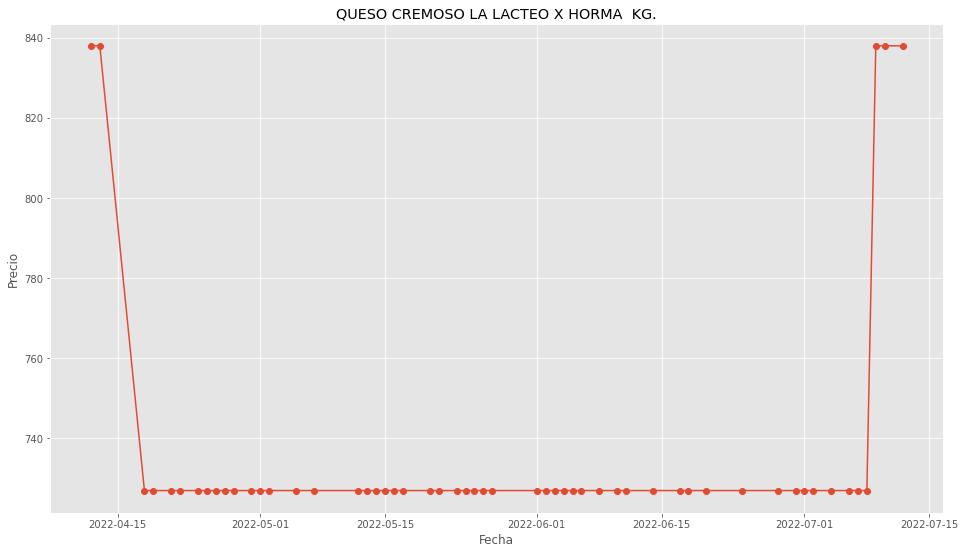

In [ ]:
# Import Library

import matplotlib.pyplot as plt

# Plot

indice=nuevas_columnas[11]
plt.plot(matriz_con_dolar[indice], marker='o')

# Labelling 

plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title(indice)

# Display

plt.show()

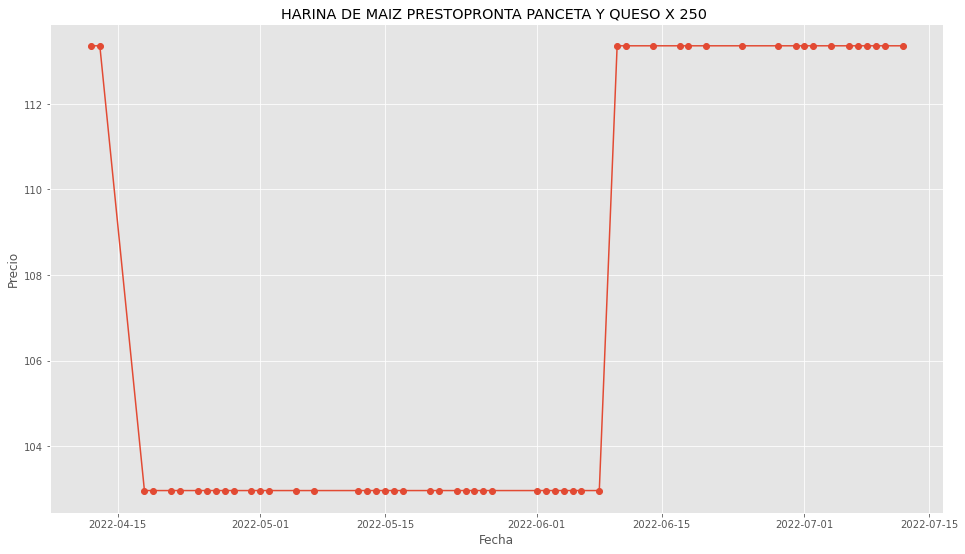

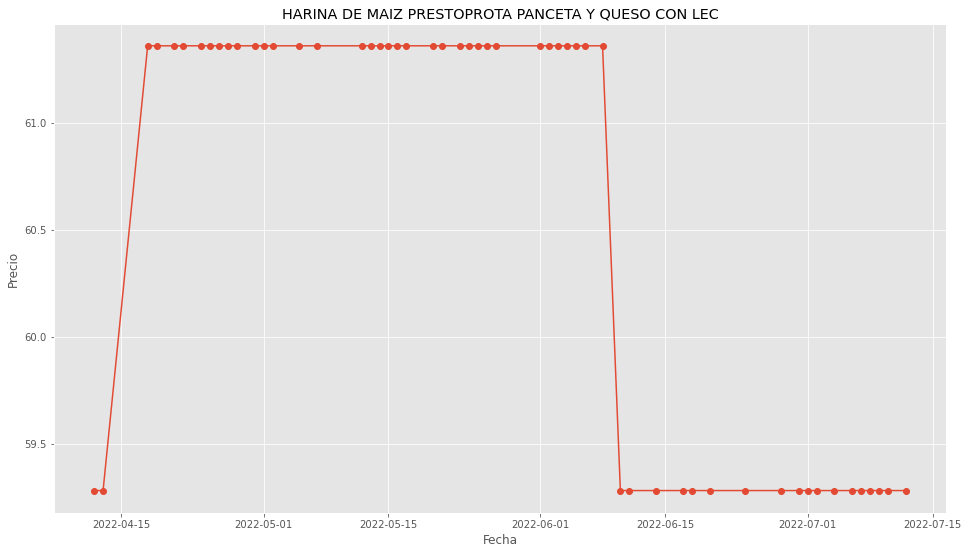

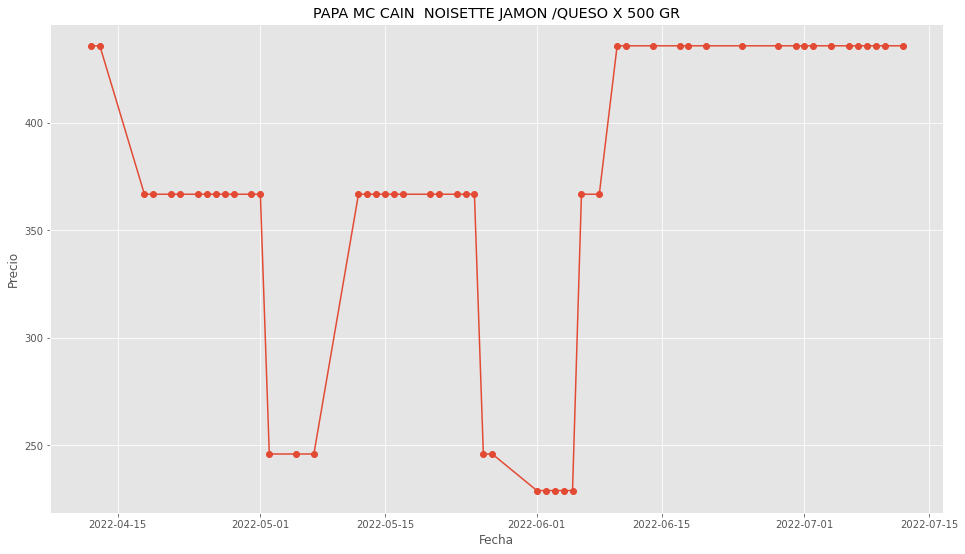

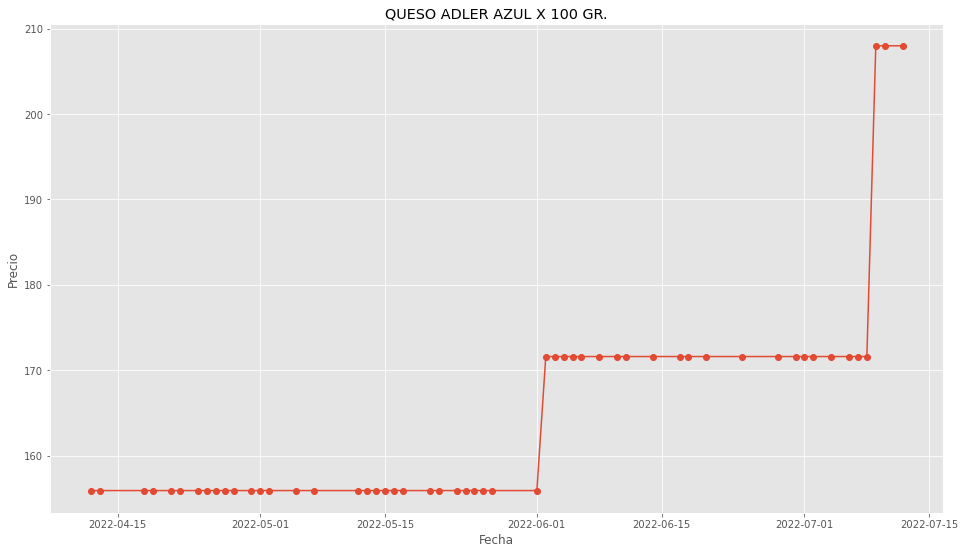

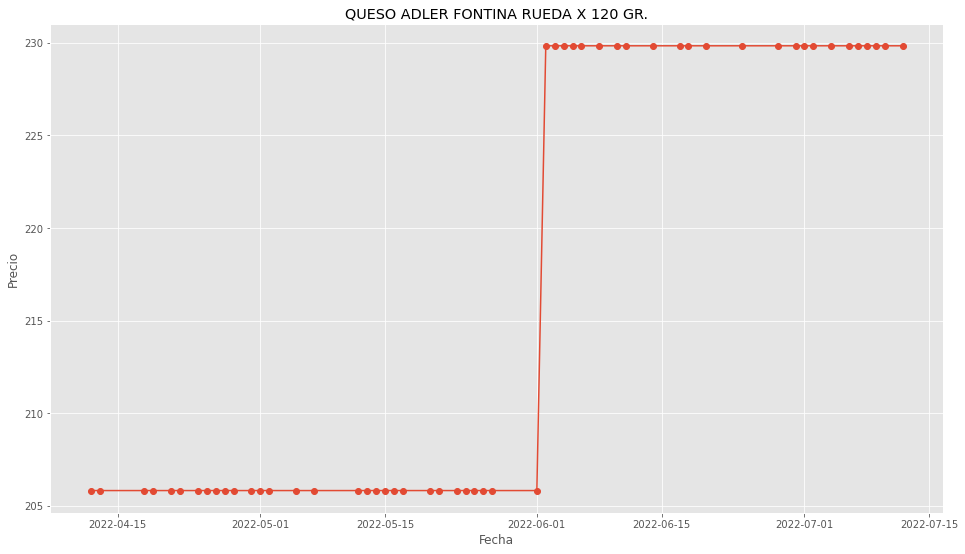

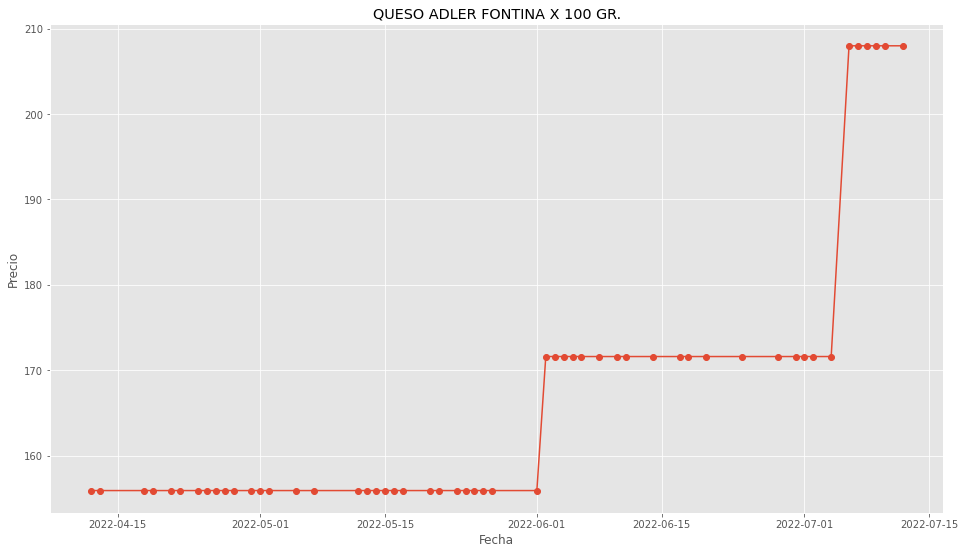

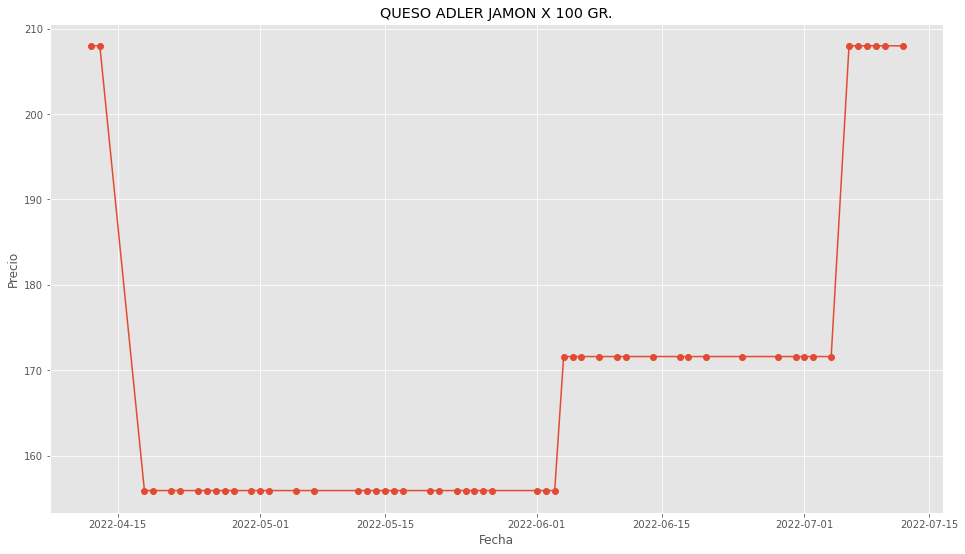

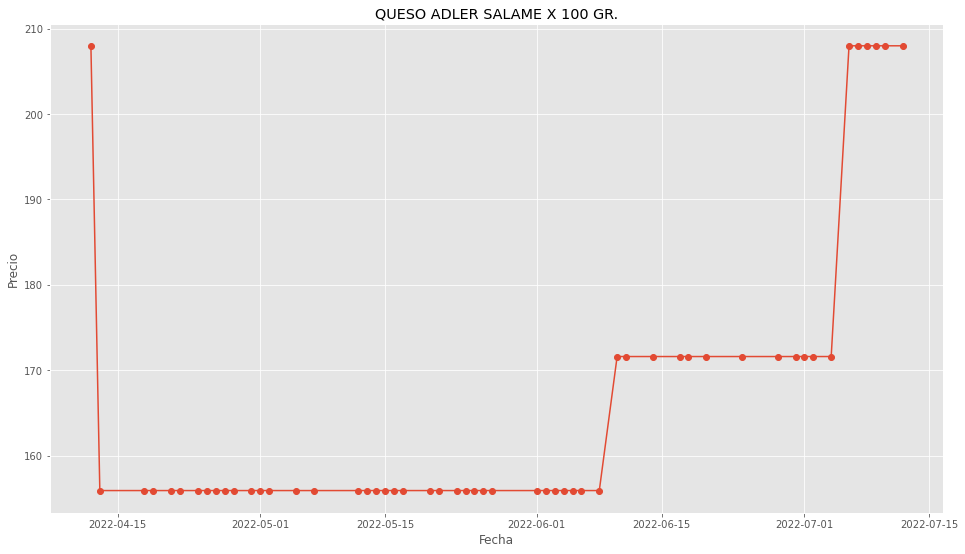

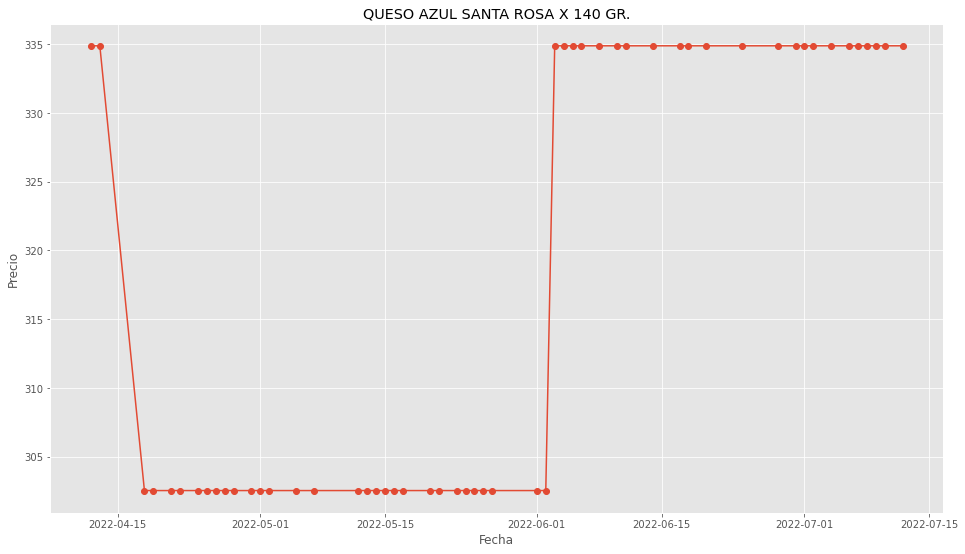

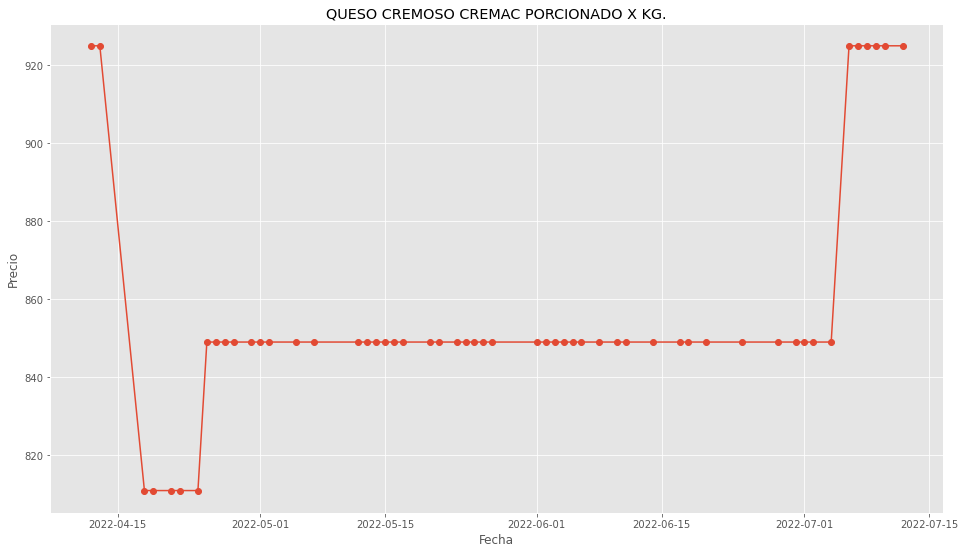

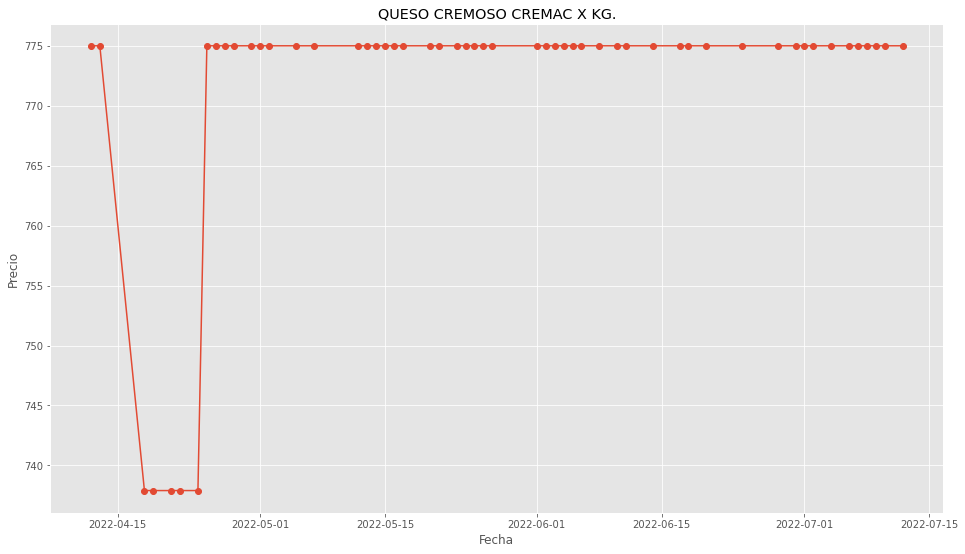

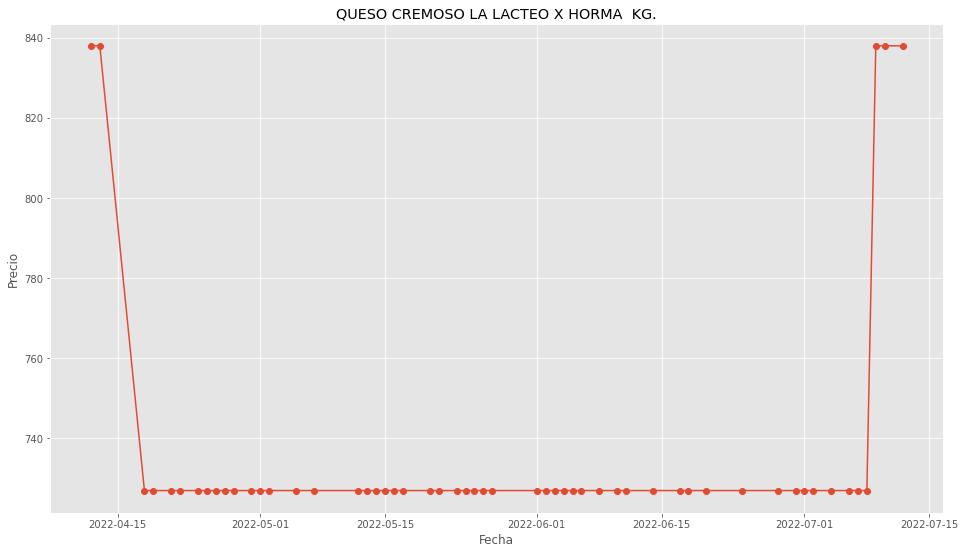

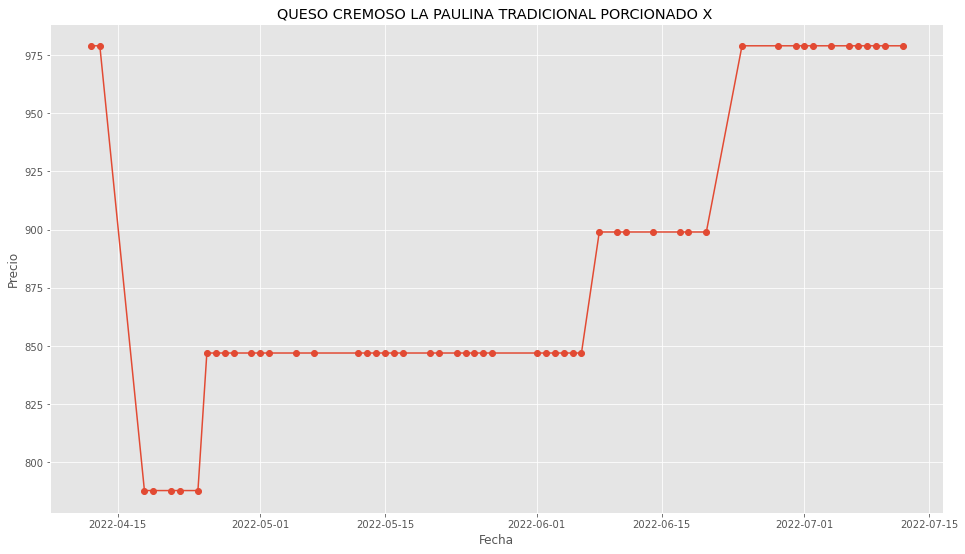

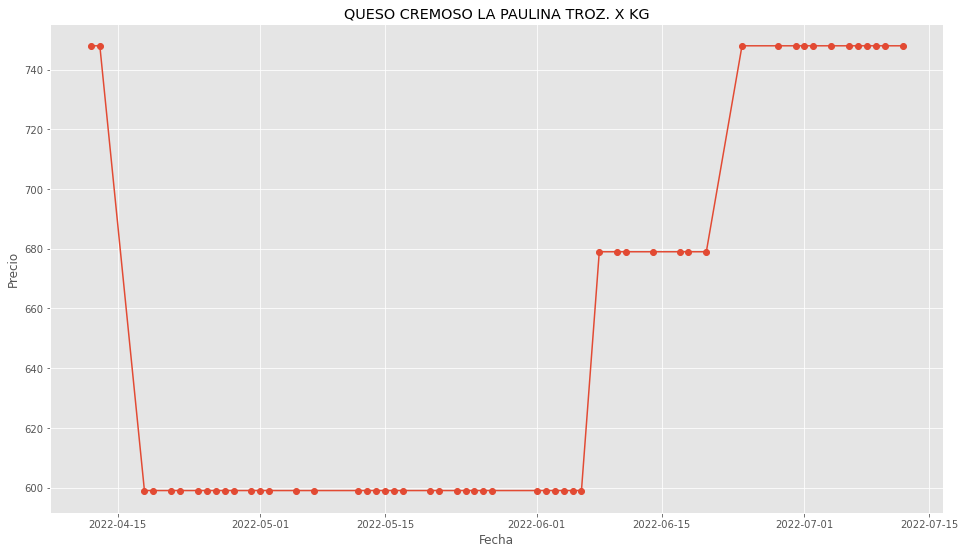

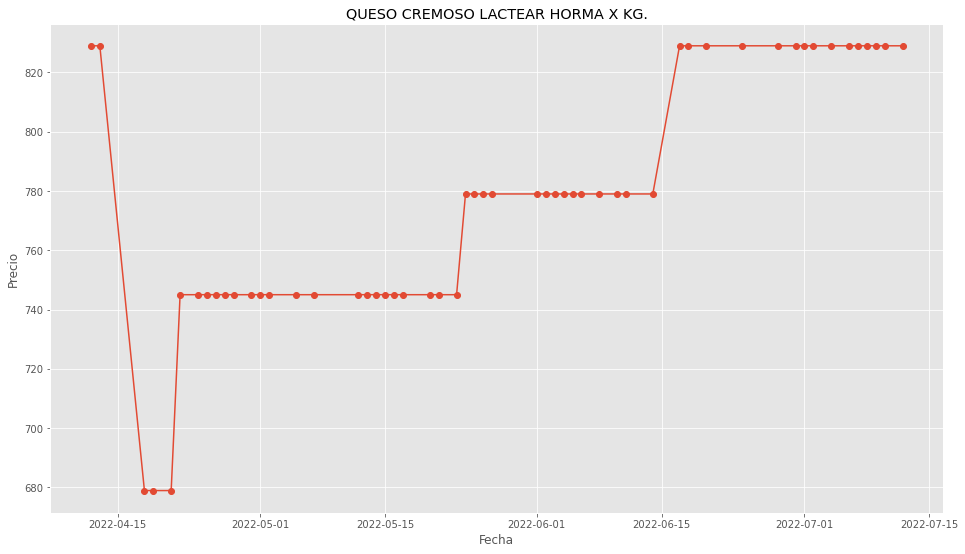

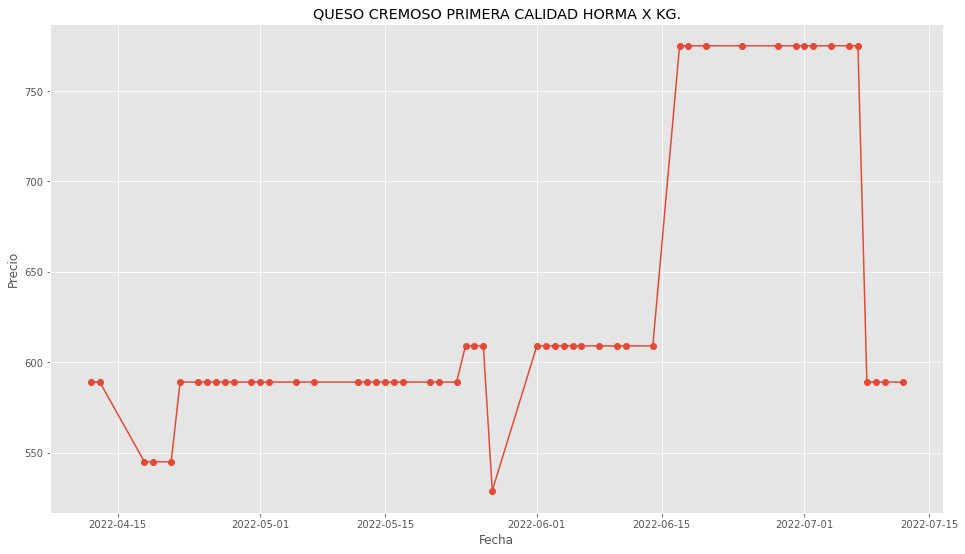

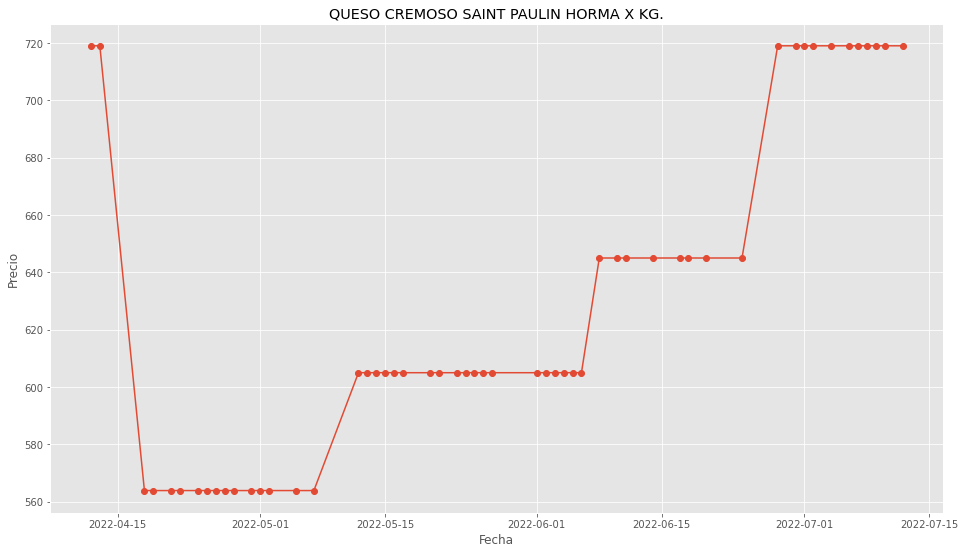

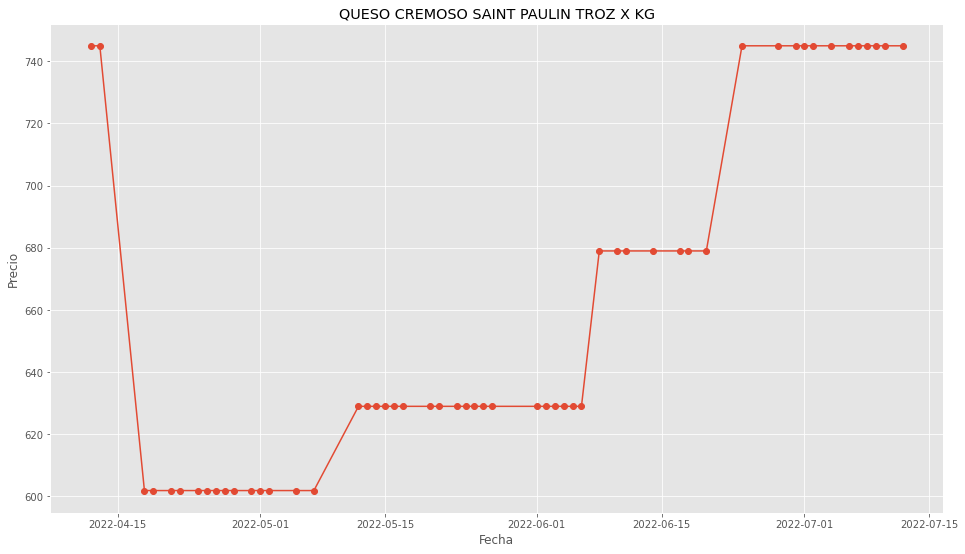

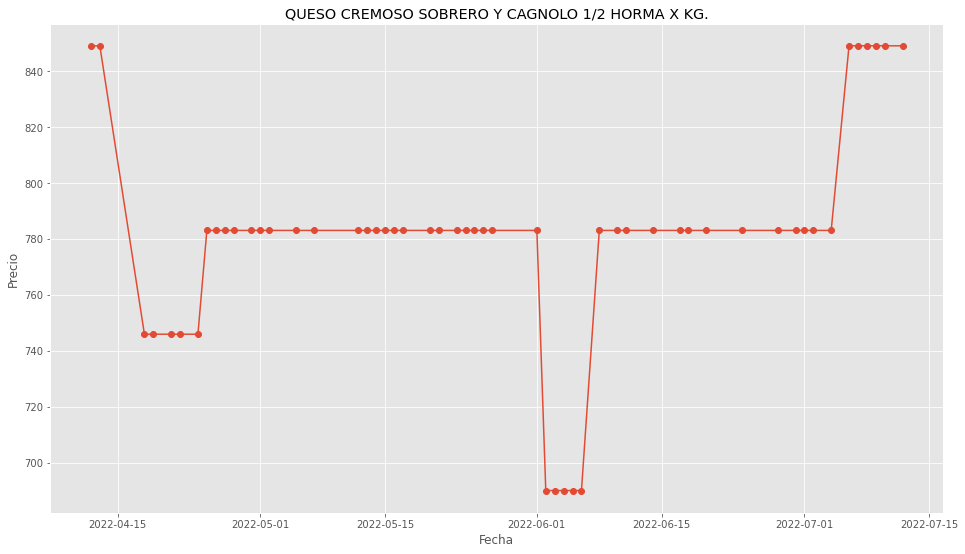

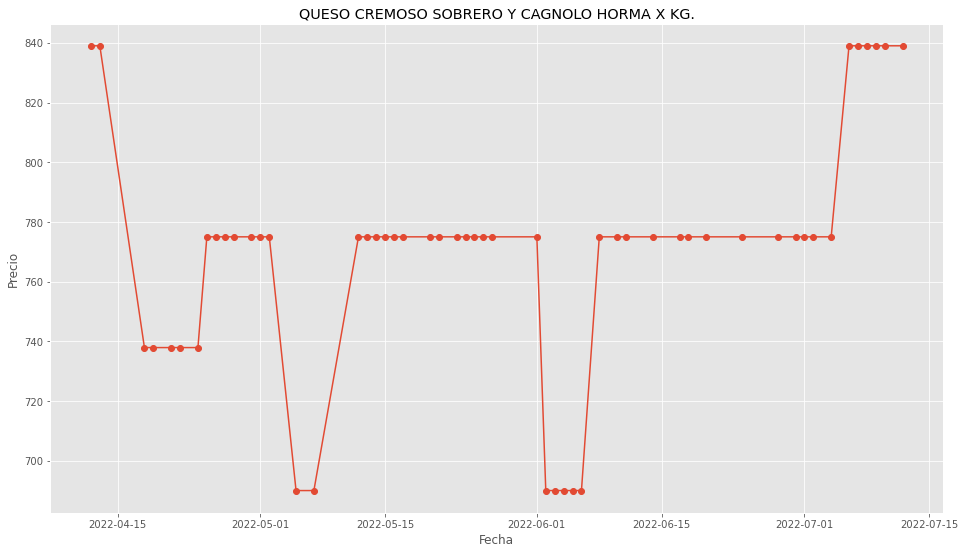

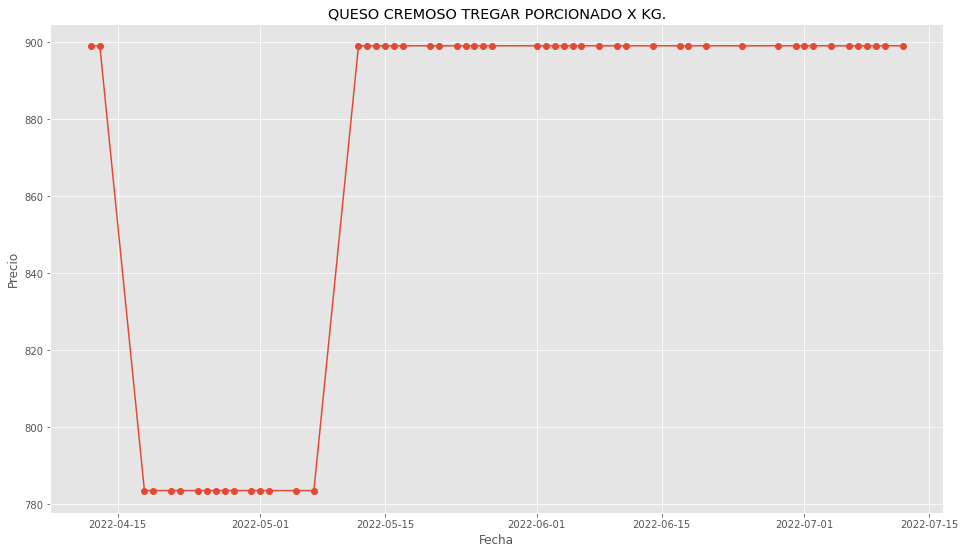

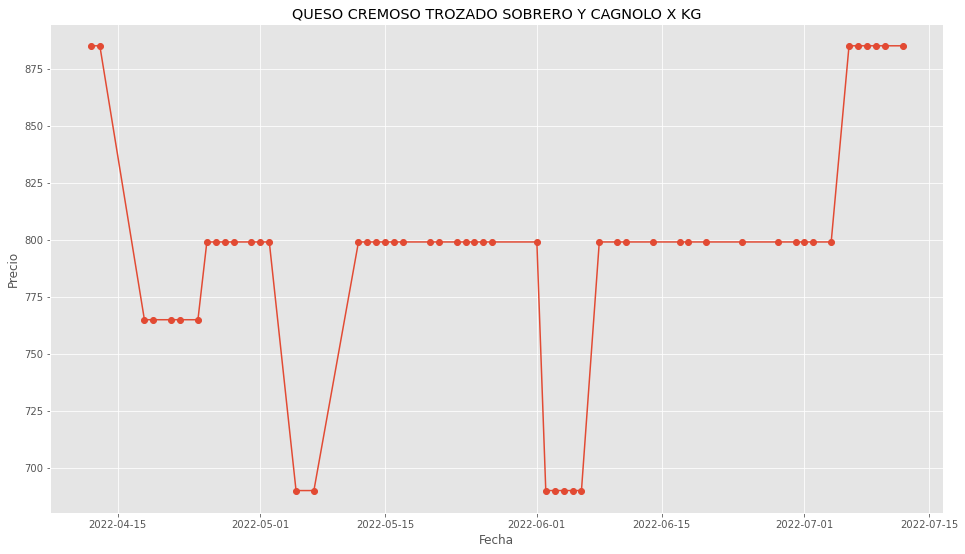

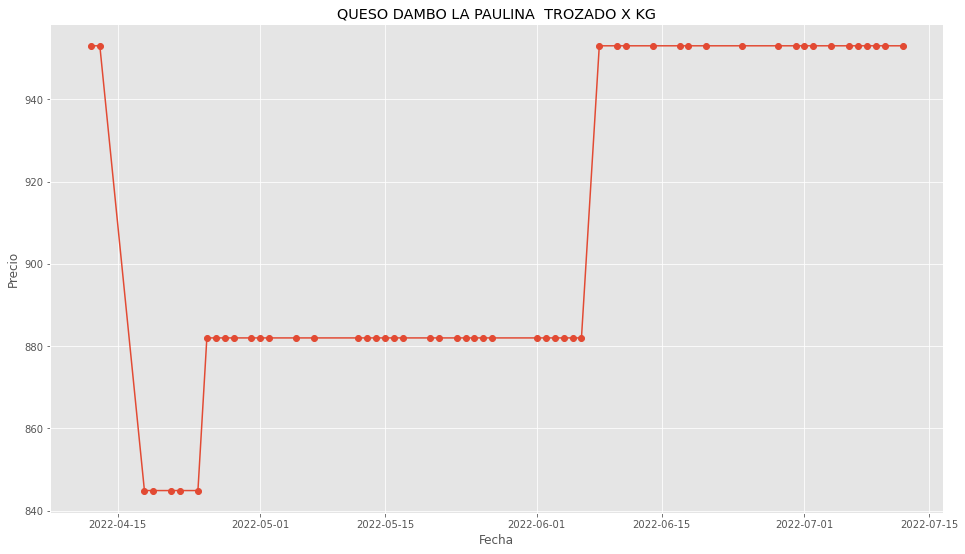

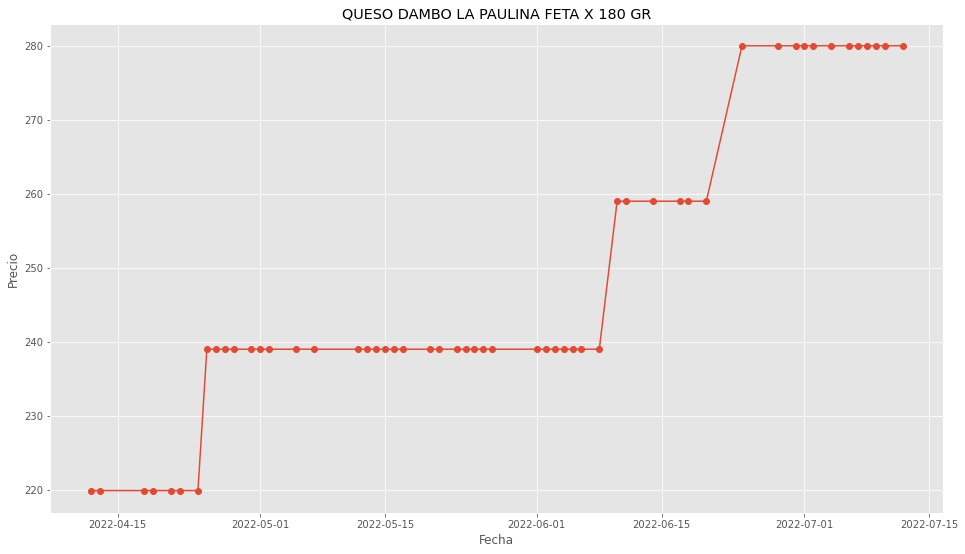

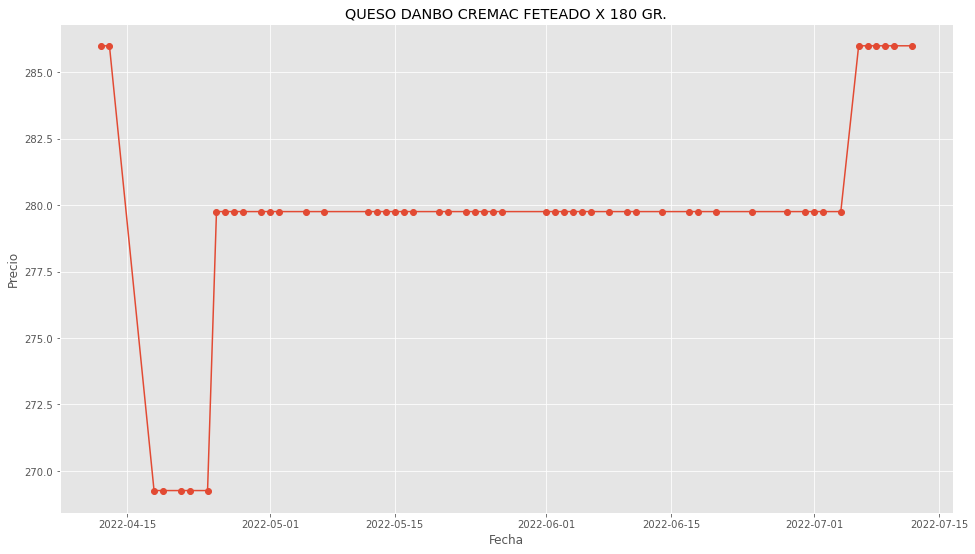

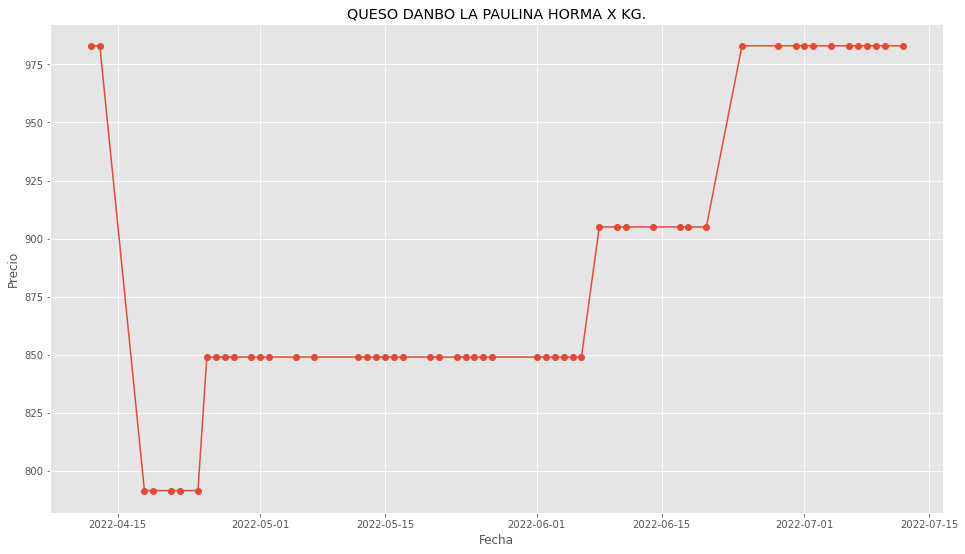

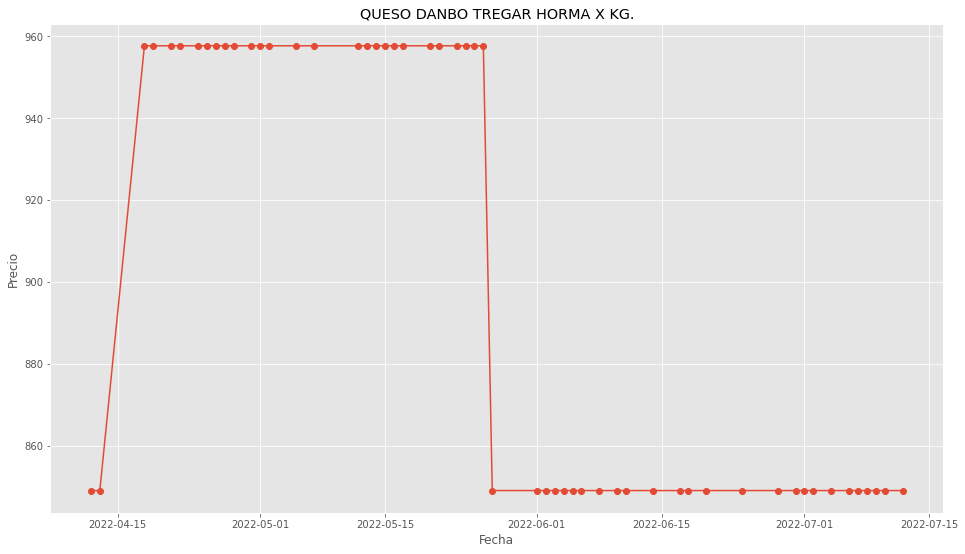

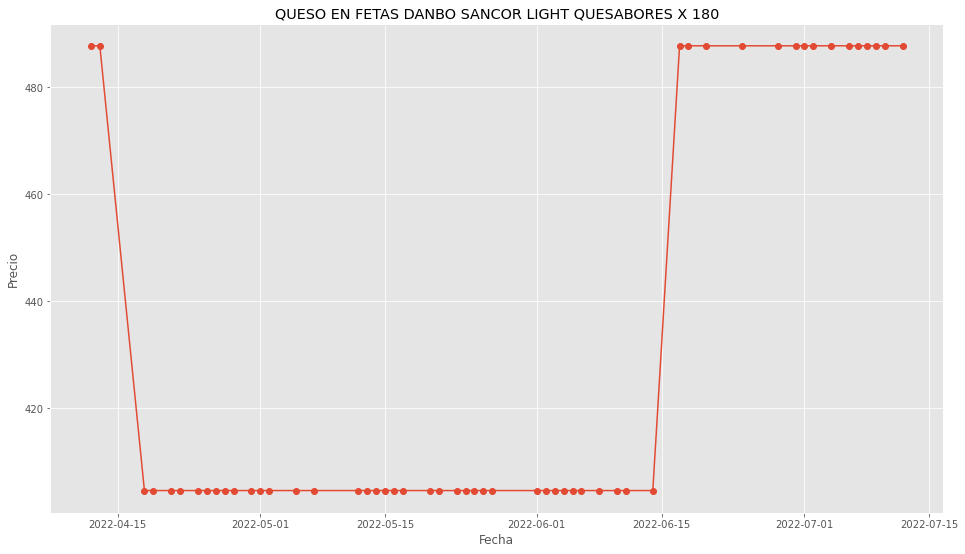

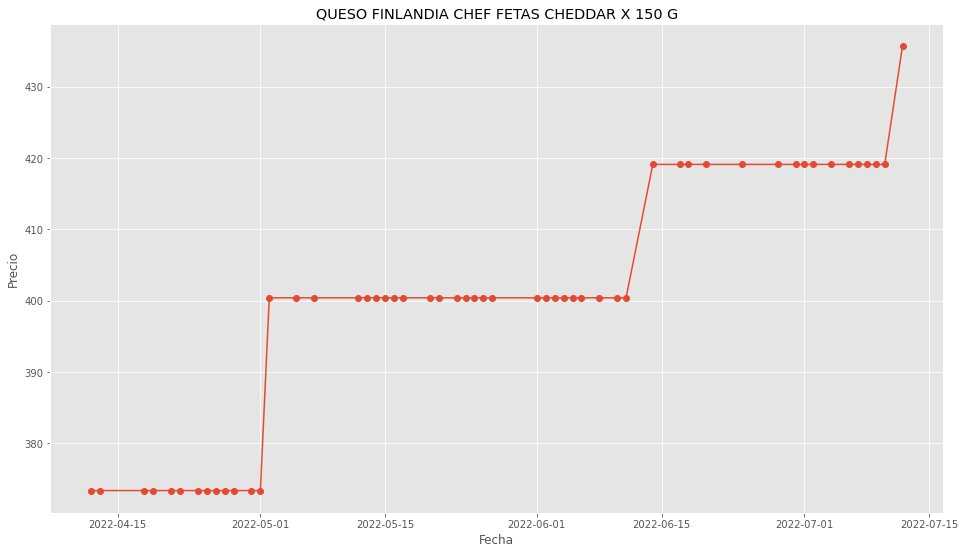

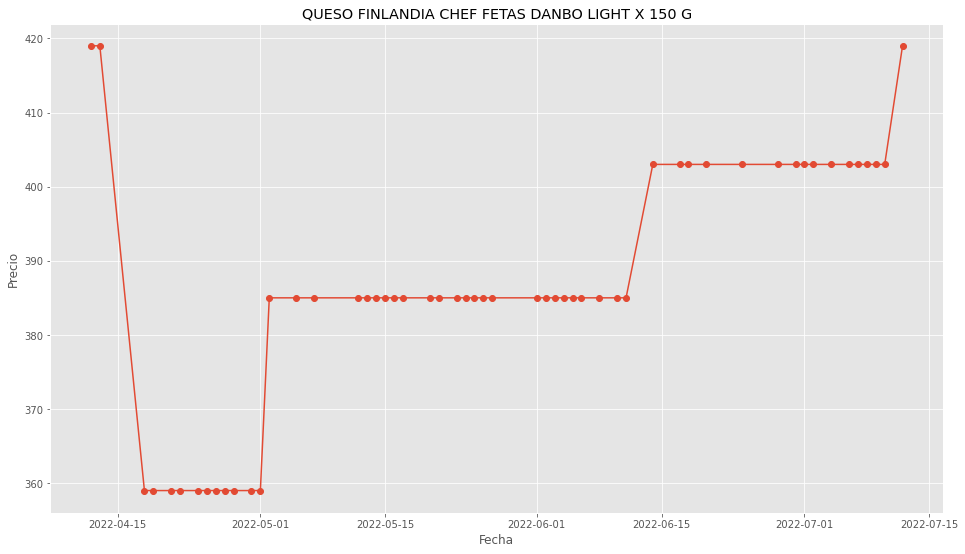

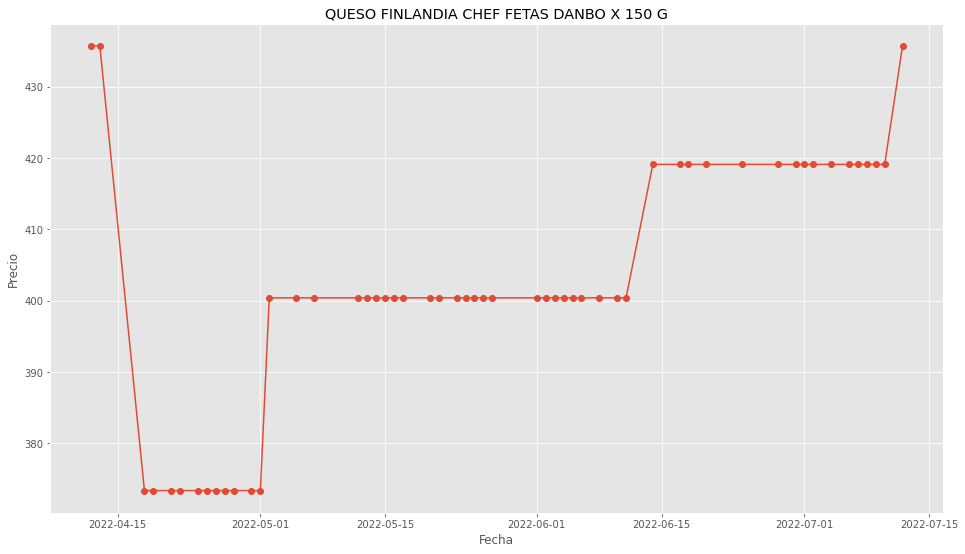

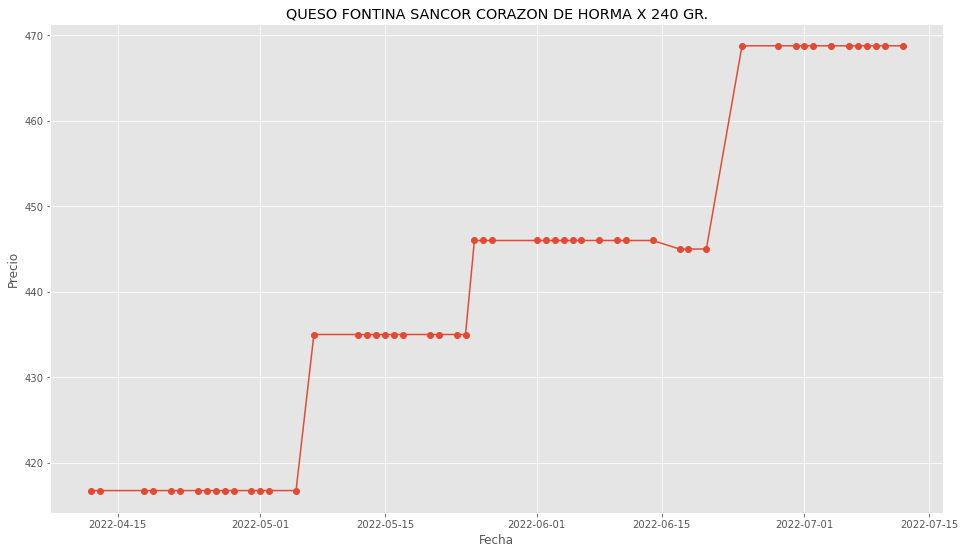

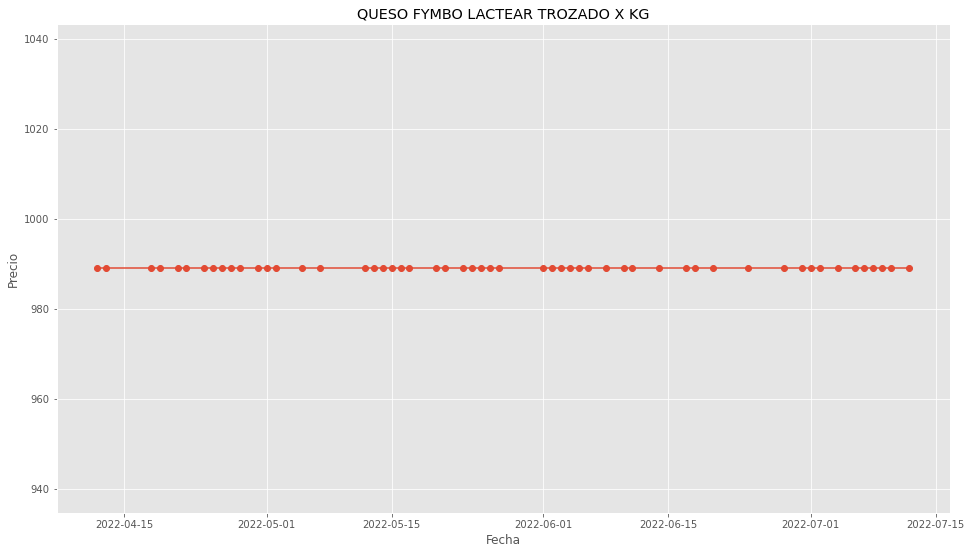

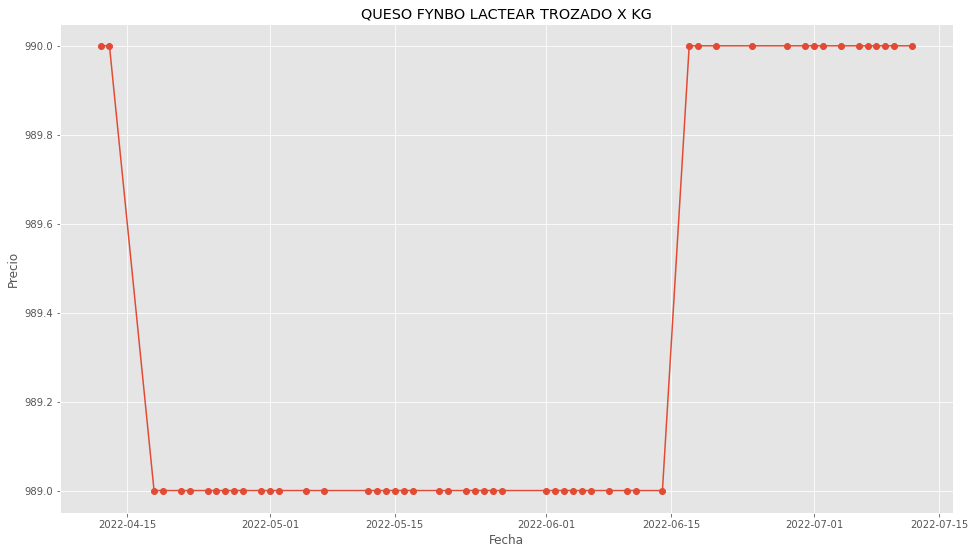

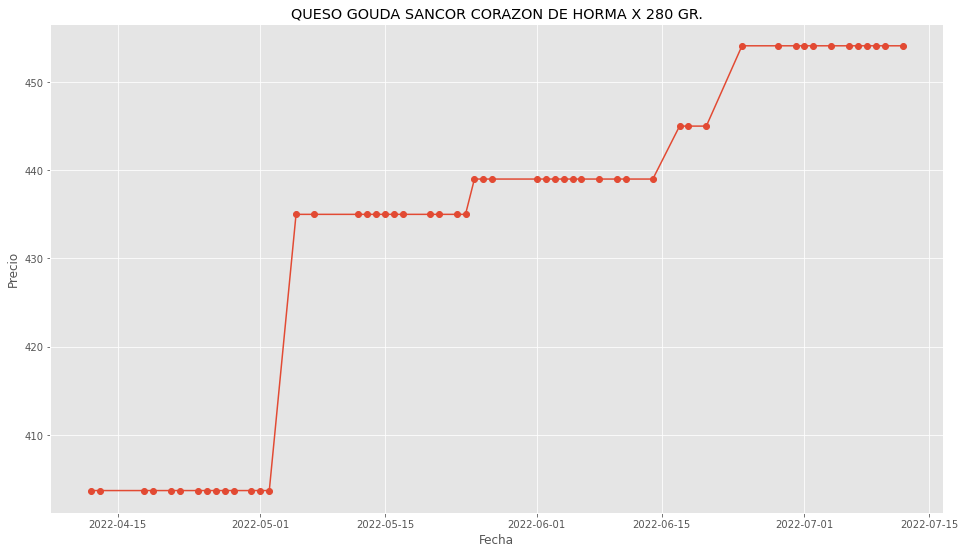

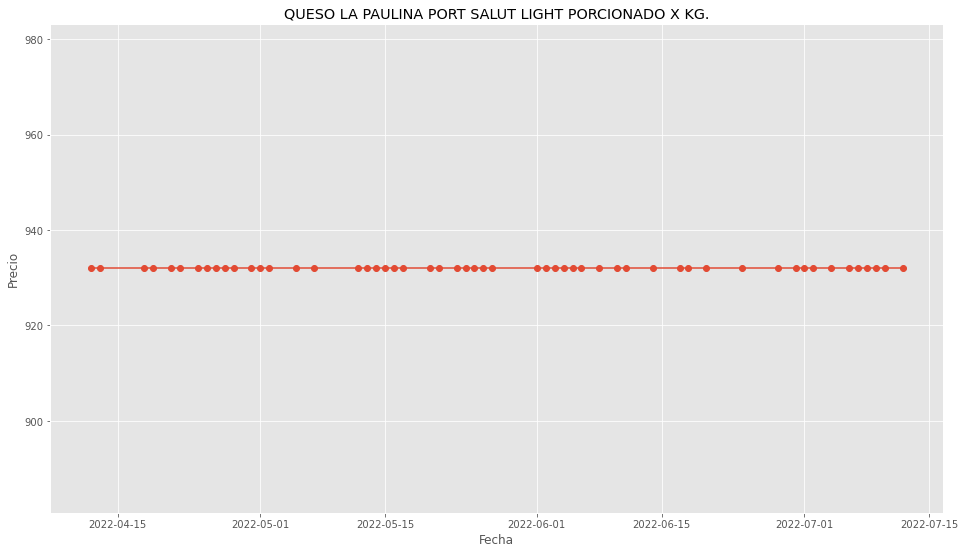

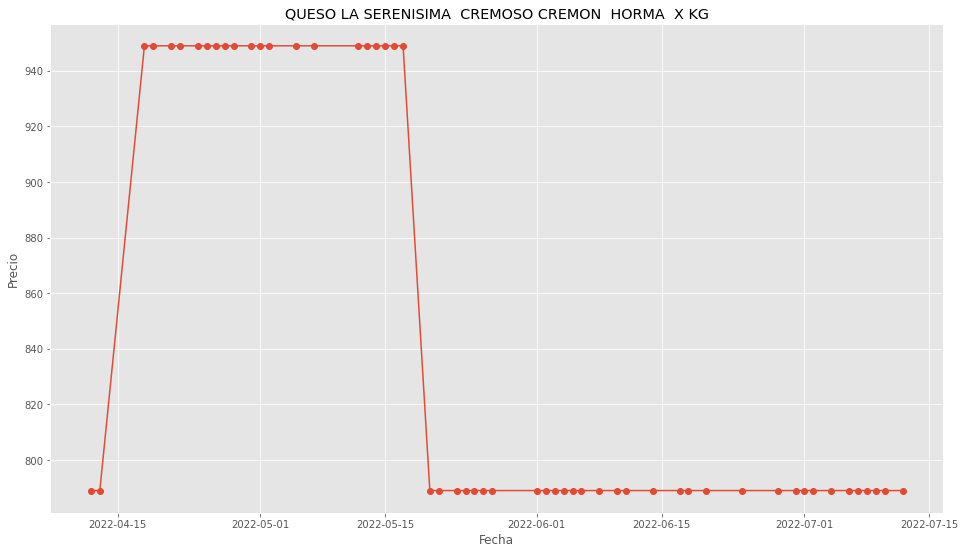

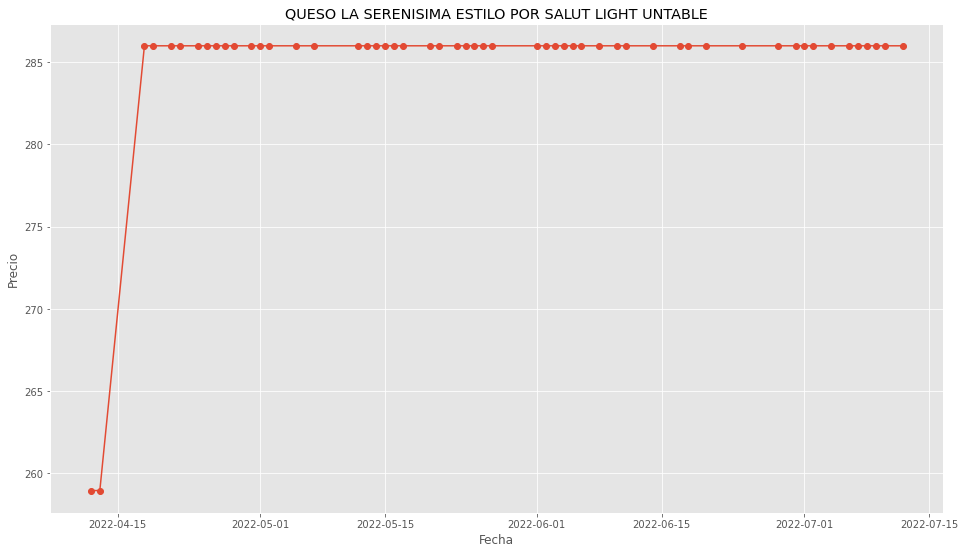

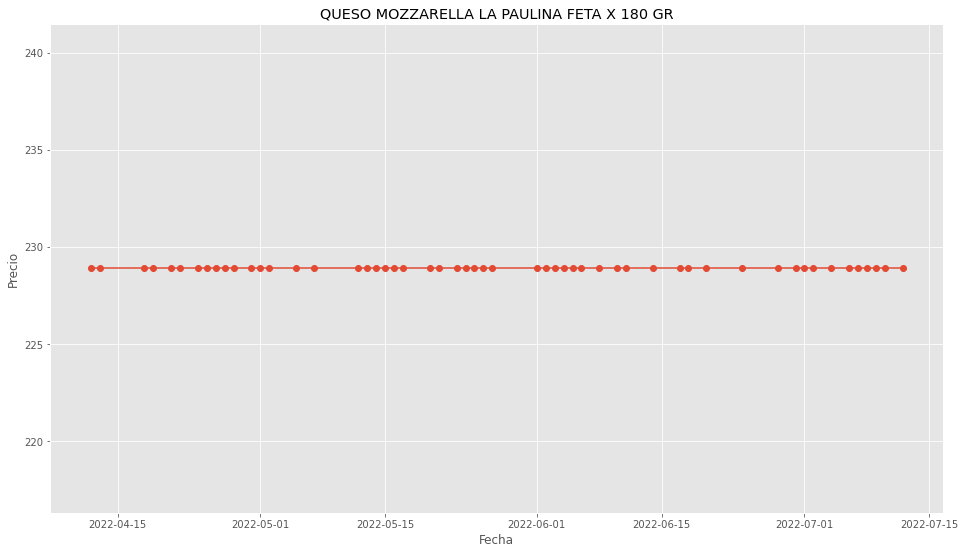

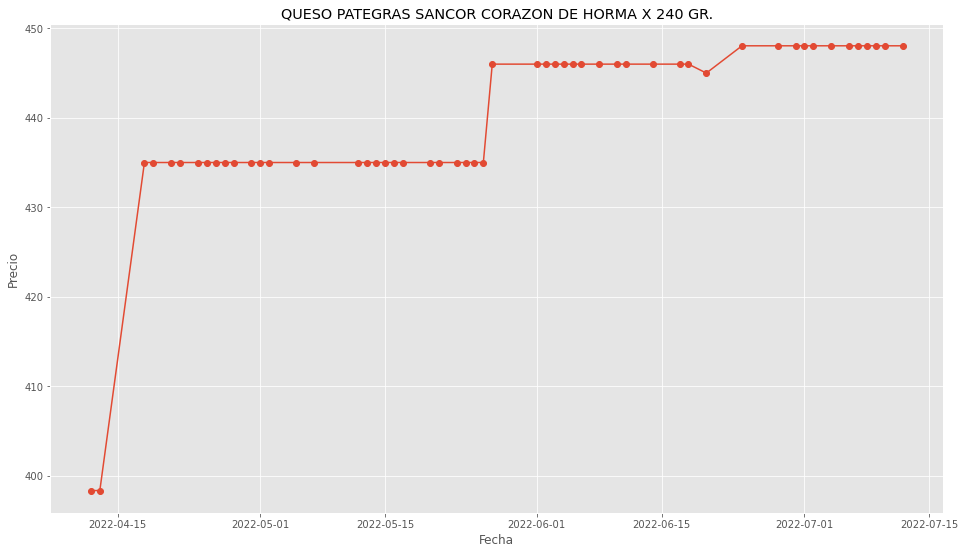

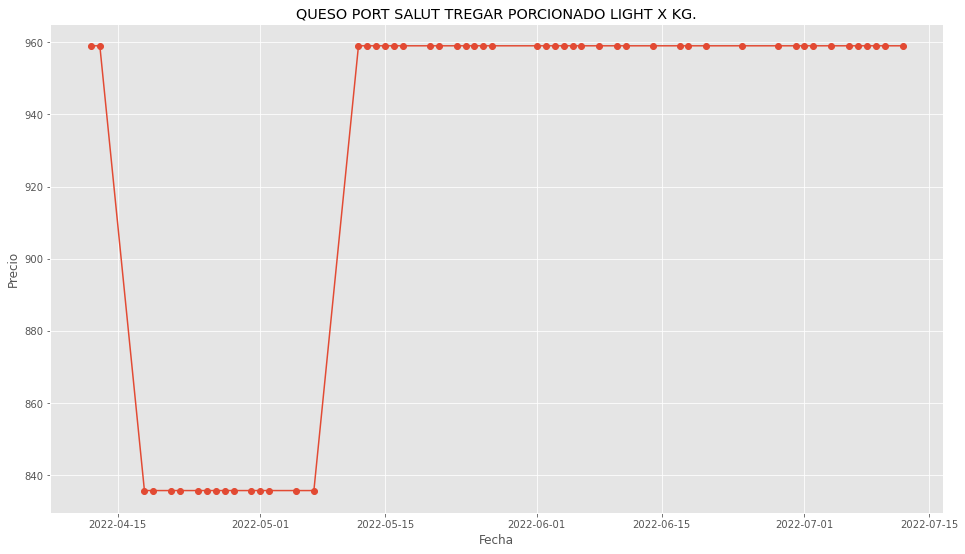

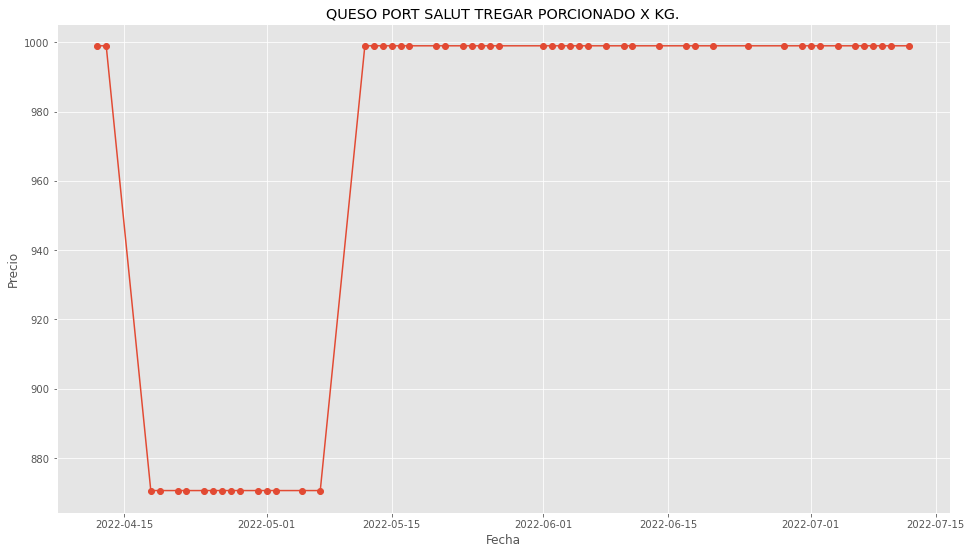

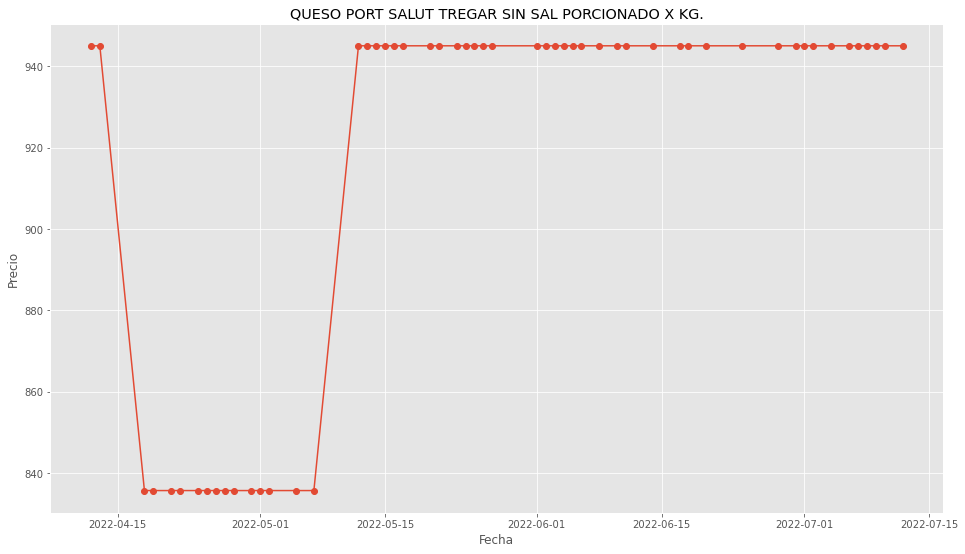

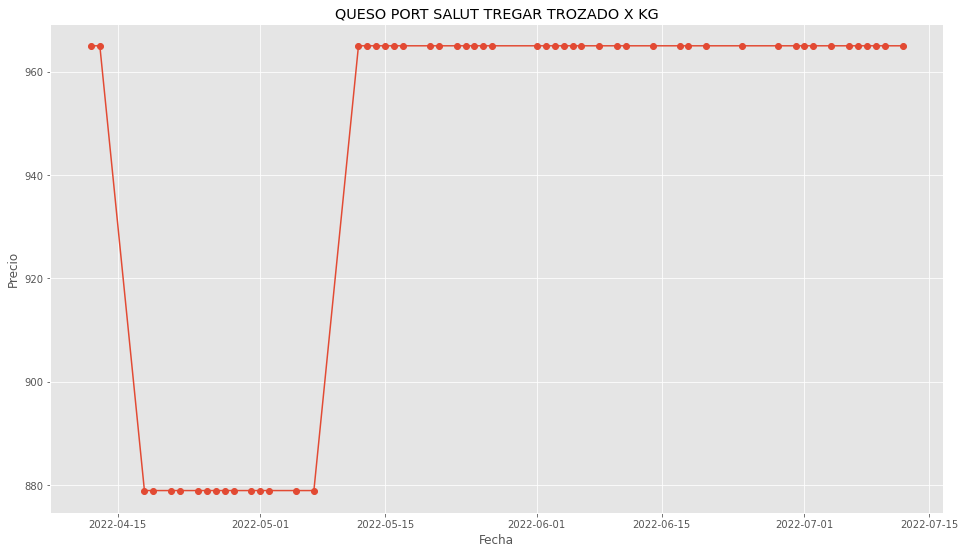

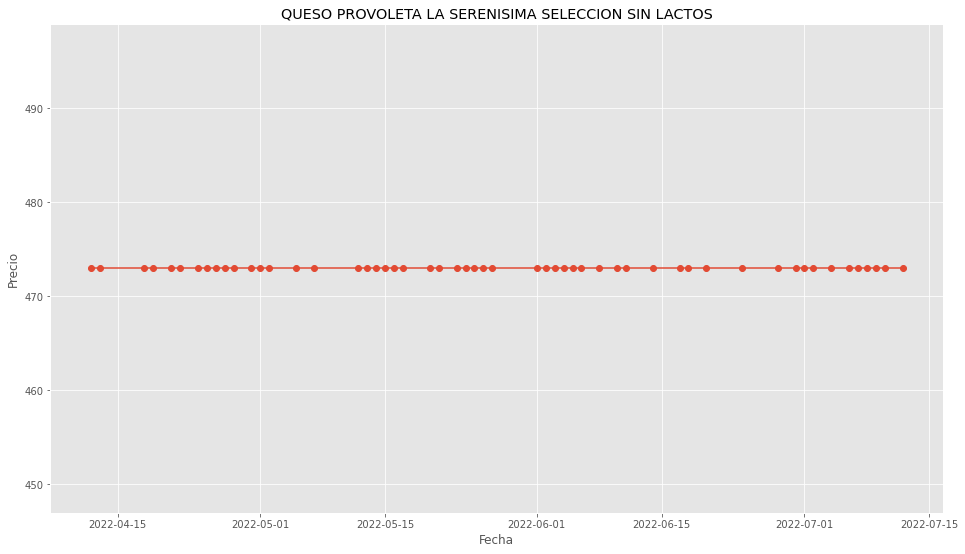

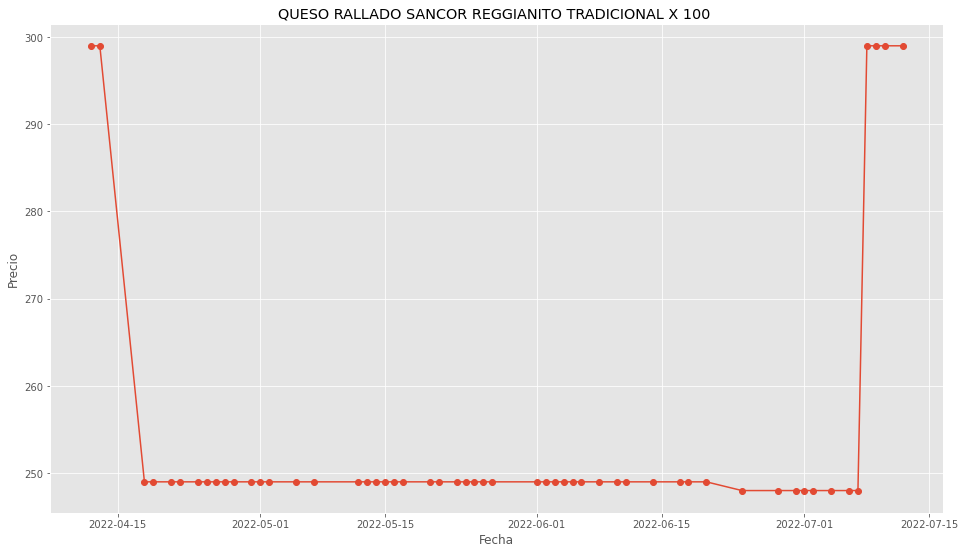

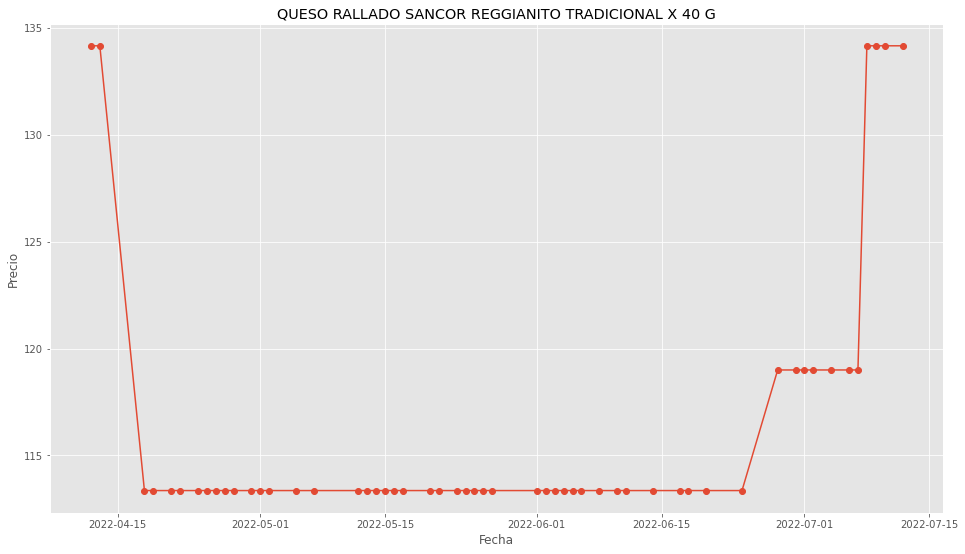

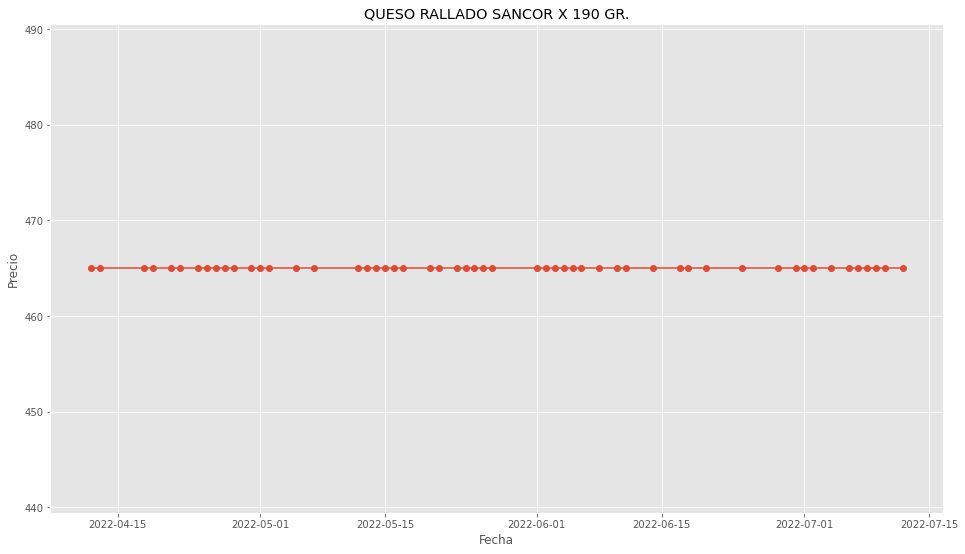

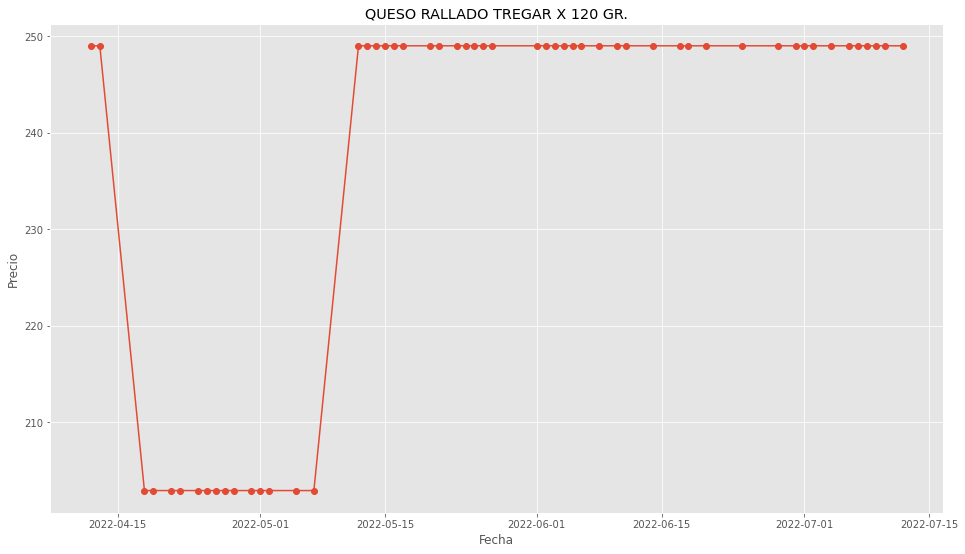

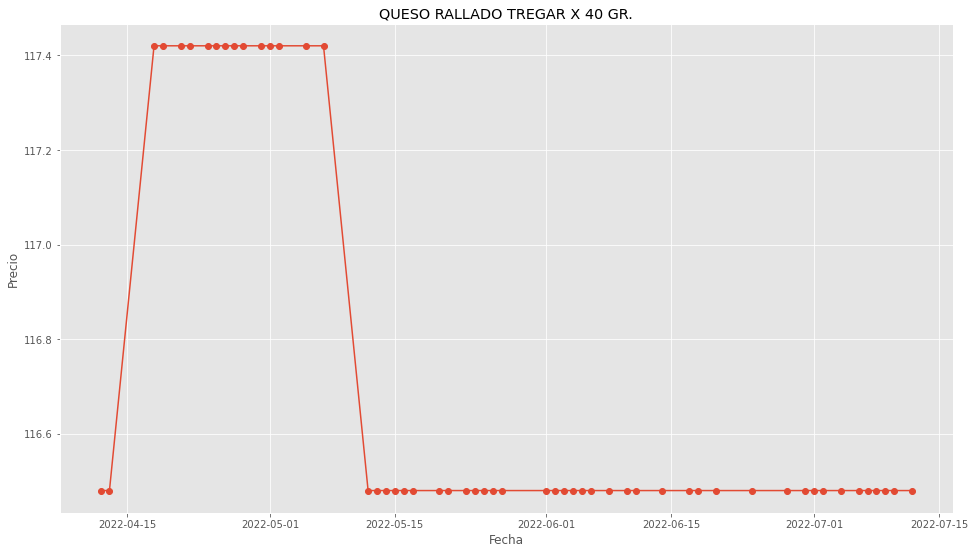

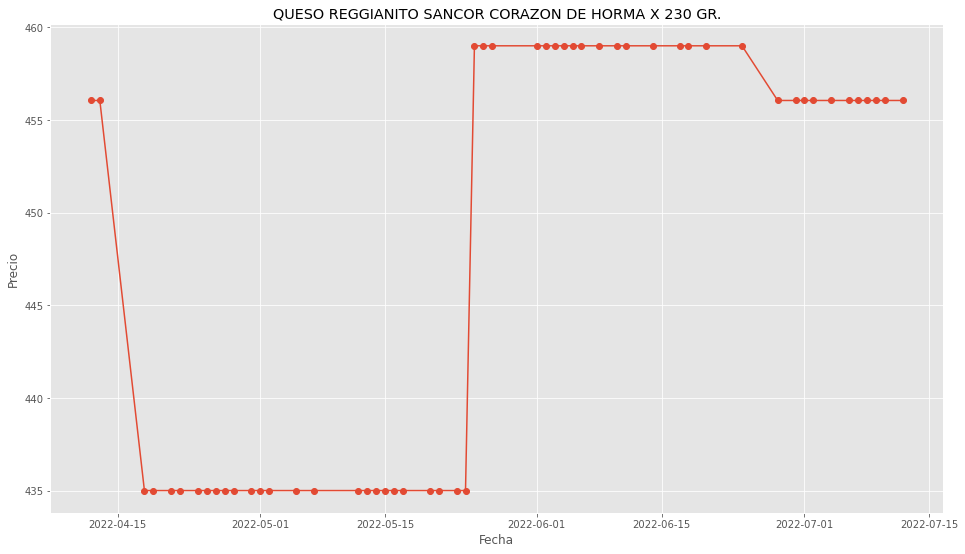

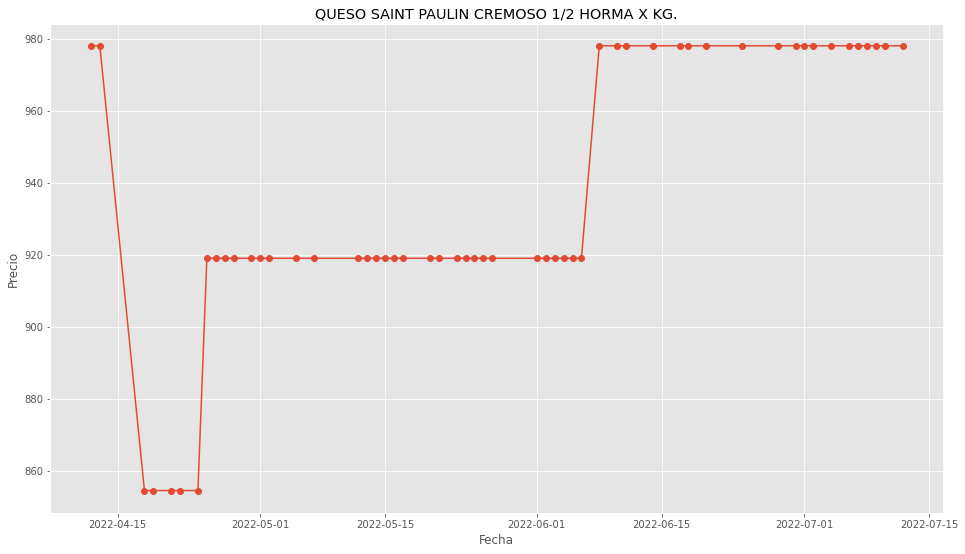

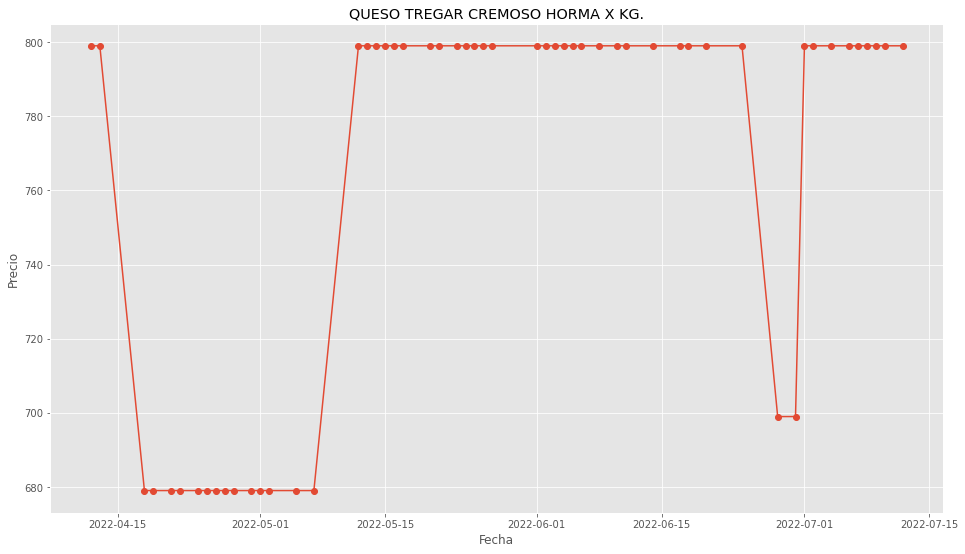

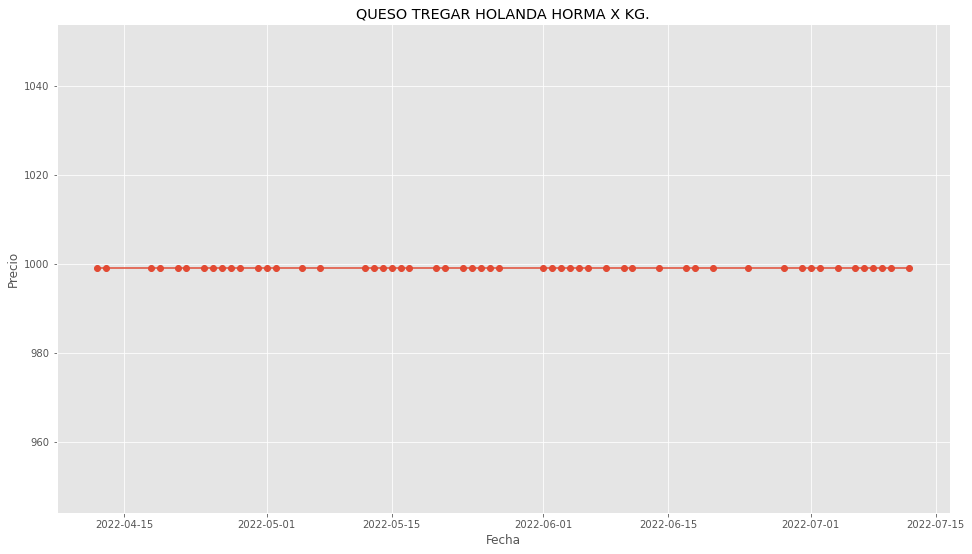

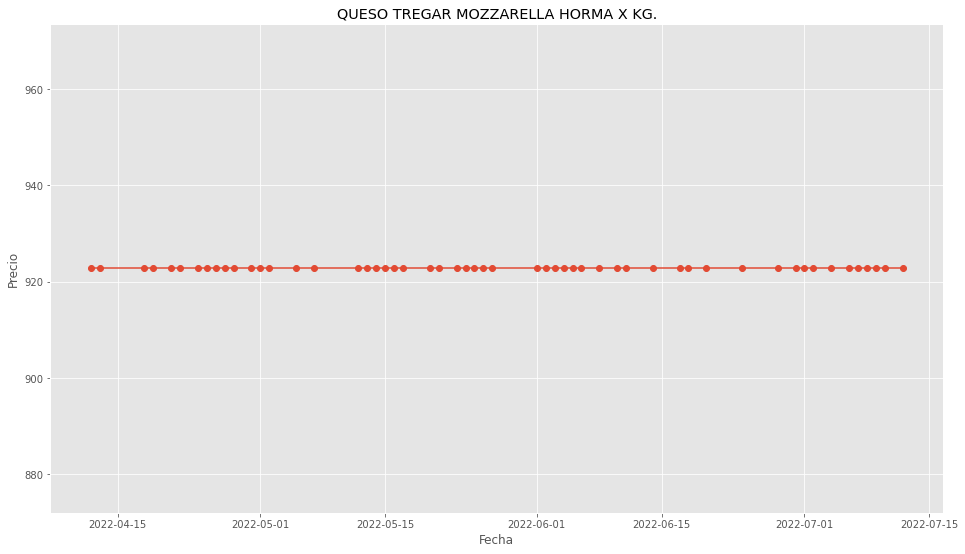

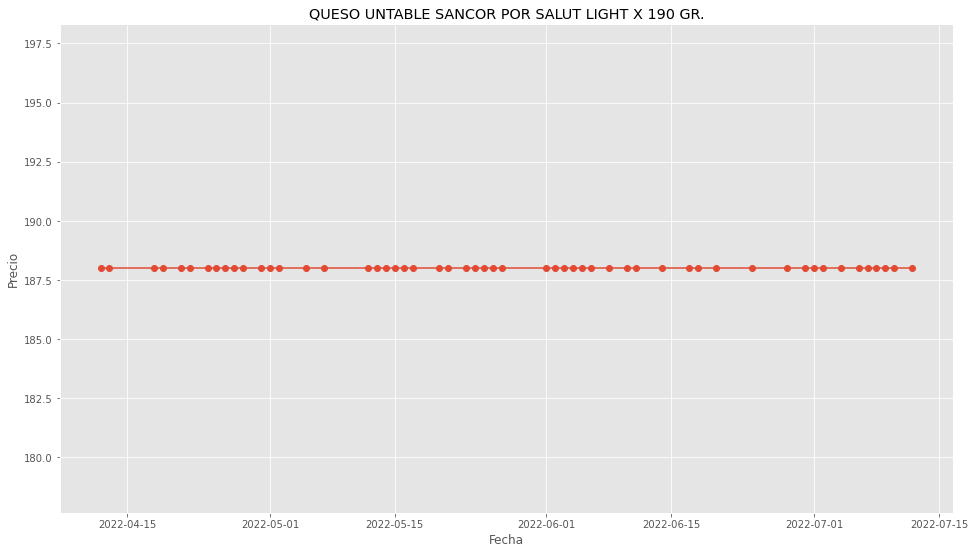

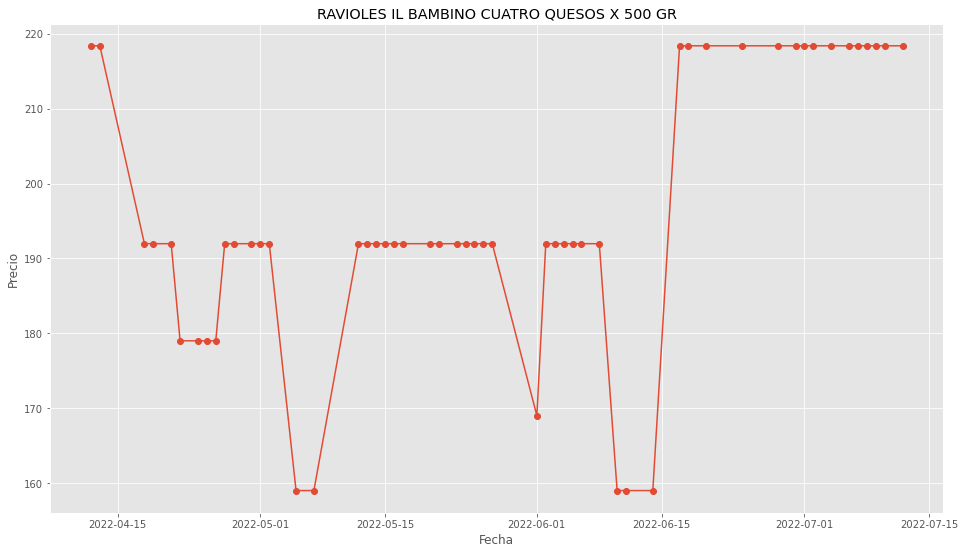

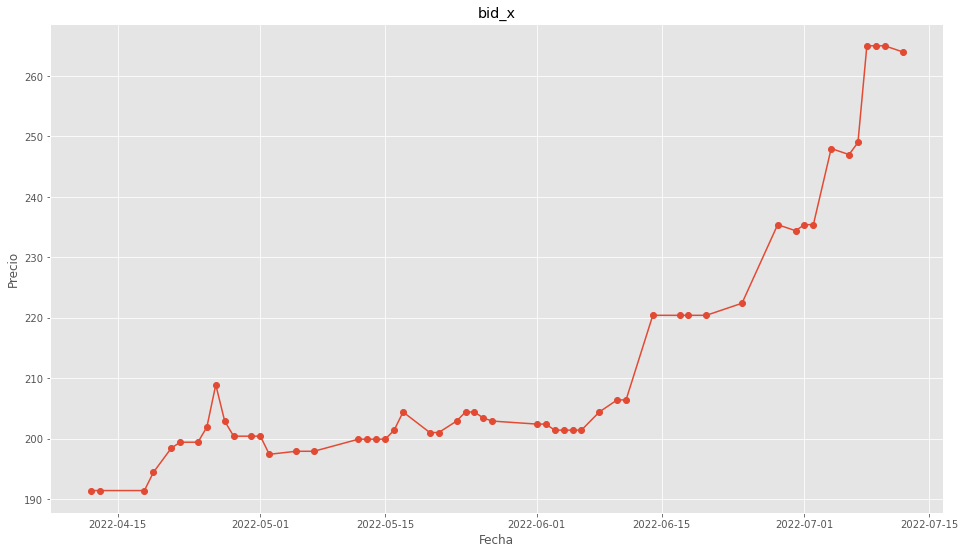

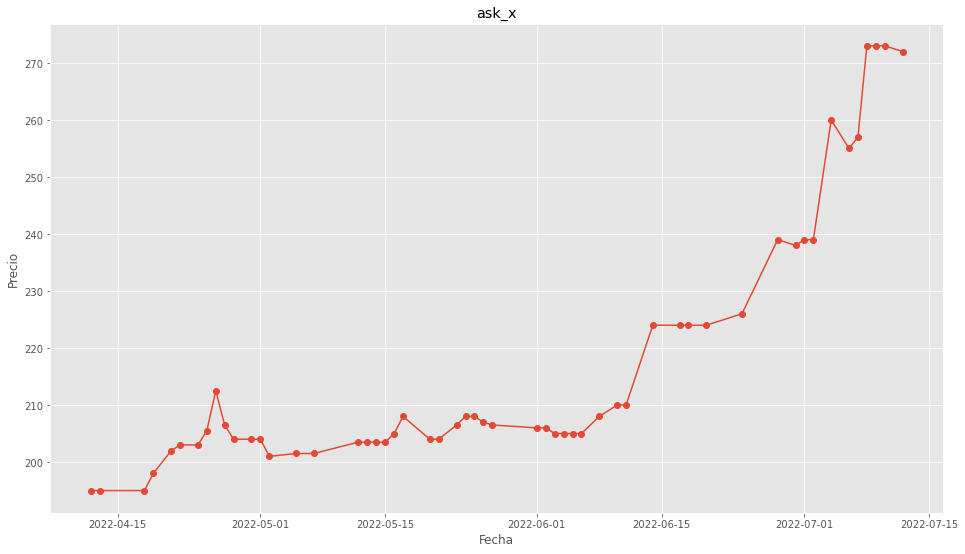

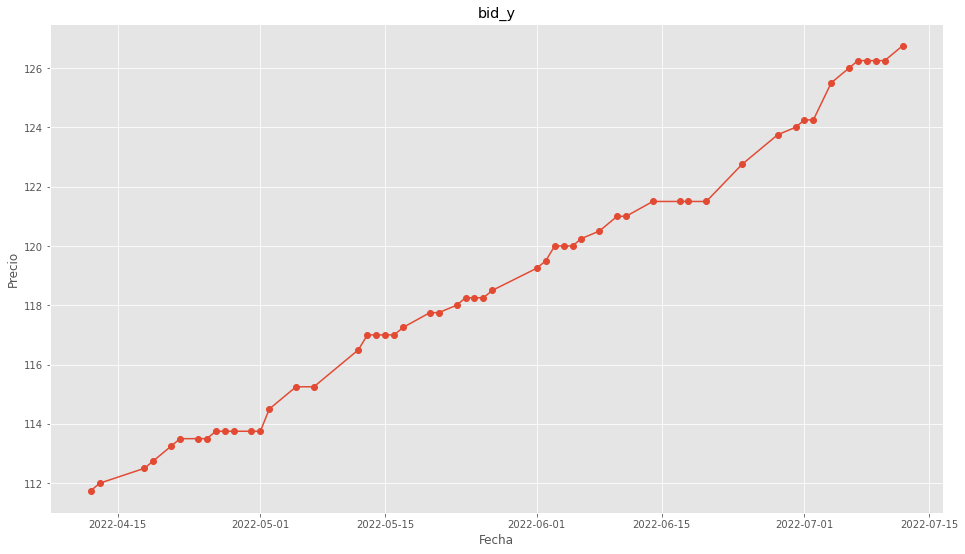

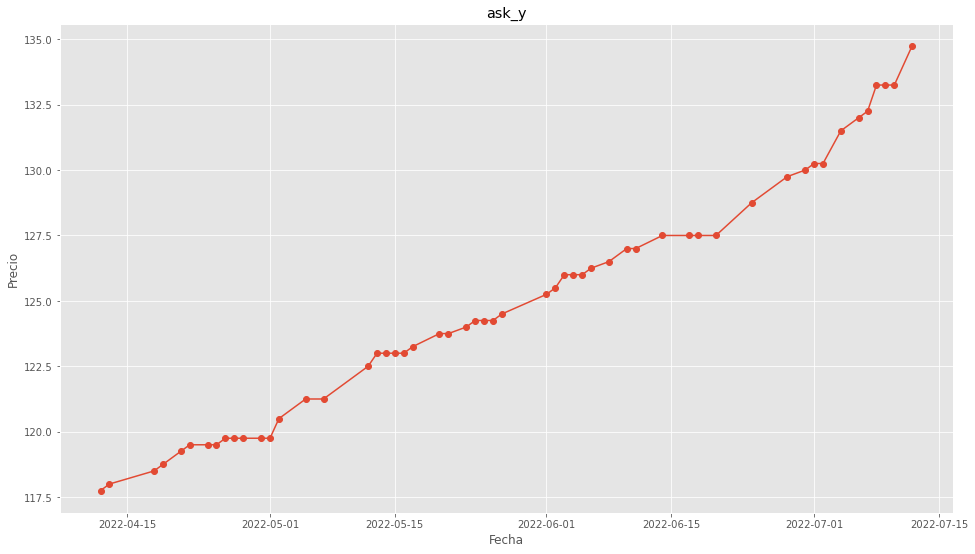

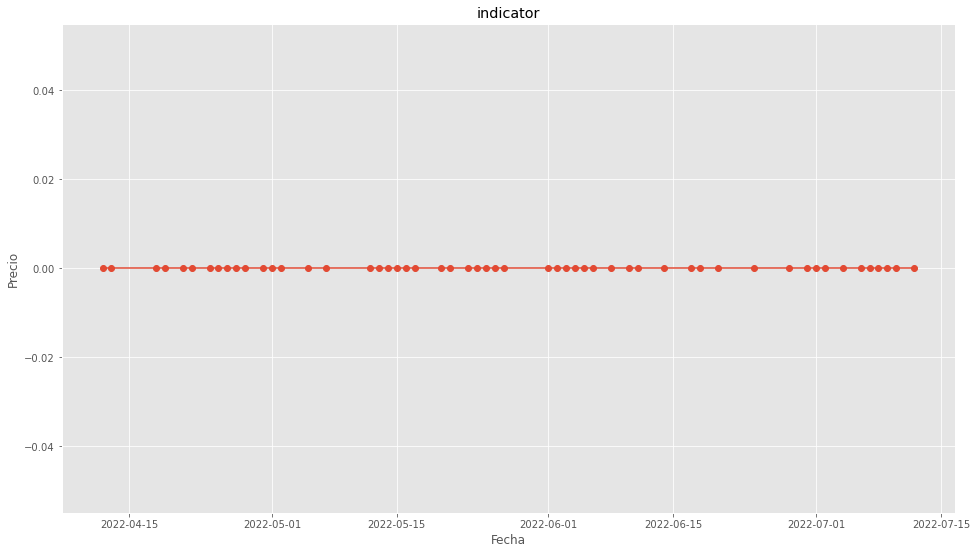

In [ ]:
# Import Library

import matplotlib.pyplot as plt

# Plot
for indice in nuevas_columnas:
    

    plt.plot(matriz_con_dolar[indice], marker='o')

    # Labelling 

    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.title(indice)

    # Display

    plt.show()

In [ ]:
matriz_con_dolar_bk=matriz_con_dolar.copy()

In [ ]:
# VAMOS A VERIFICAR SI HAY COLUMNAS QUE TENGAN LOS MISMOS PRECIOS EN TODAS LAS FILAS, DE SER ASI SE PODRIA  TRATAR DE UN MISMO PRODUCTO CON DISTINCAS DENOMINACIONES Y QUE NO APORTARA INFORMACION UTIL

duplicados =[]

for col in range(matriz_con_dolar.shape[1]):
        contents= matriz_con_dolar.iloc[:, col]
        
        for comp in range( col + 1,matriz_con_dolar.shape[1]):
            if contents.equals(matriz_con_dolar.iloc[:, comp]):
                duplicados.append(comp)
                
duplicados = np.unique(duplicados).tolist()

print(matriz_con_dolar.iloc[:, duplicados].head())

print("MATRIZ ANTES DE ELIMINAR COLUMNAS:"+str(matriz_con_dolar.shape))

print(matriz_con_dolar.iloc[:, duplicados].columns)
      
matriz_con_dolar=matriz_con_dolar.drop( matriz_con_dolar.iloc[:, duplicados].columns,axis=1)
print("MATRIZ DESPUES DE ELIMINAR COLUMNAS:"+str(matriz_con_dolar.shape))

Empty DataFrame
Columns: []
Index: [2022-04-12 00:00:00, 2022-04-13 00:00:00, 2022-04-18 00:00:00, 2022-04-19 00:00:00, 2022-04-21 00:00:00]
MATRIZ ANTES DE ELIMINAR COLUMNAS:(54, 62)
Index([], dtype='object')
MATRIZ DESPUES DE ELIMINAR COLUMNAS:(54, 62)


In [ ]:
matriz_con_dolar.describe()

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
count                                          54.000000    
mean                                          106.811852    
std                                             5.069358    
min                                           102.960000    
25%                                           102.960000    
50%                                           102.960000    
75%                                           113.360000    
max                                           113.360000    

       HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
count                                          54.000000    
mean                                           60.589630    
std                                             1.013872    
min                                            59.280000    
25%                                            59.280000    
50%                                            61.360000    
75%                                            61.360000    
max                                            61.360000    

       PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
count                                     54.000000   
mean                                     368.378519   
std                                       70.427605   
min                                      229.000000   
25%                                      366.760000   
50%                                      366.760000   
75%                                      435.760000   
max                                      435.760000   

       QUESO ADLER AZUL X 100 GR.  QUESO ADLER FONTINA RUEDA X 120 GR.  \
count                   54.000000                            54.000000   
mean                   164.900000                           216.495556   
std                     12.991666                            12.047708   
min                    155.900000                           205.820000   
25%                    155.900000                           205.820000   
50%                    155.900000                           205.820000   
75%                    171.600000                           229.840000   
max                    208.000000                           229.840000   

       QUESO ADLER FONTINA X 100 GR.  QUESO ADLER JAMON X 100 GR.  \
count                      54.000000                     54.00000   
mean                      166.922222                    168.27037   
std                        16.346977                     18.11687   
min                       155.900000                    155.90000   
25%                       155.900000                    155.90000   
50%                       155.900000                    155.90000   
75%                       171.600000                    171.60000   
max                       208.000000                    208.00000   

       QUESO ADLER SALAME X 100 GR.  QUESO AZUL SANTA ROSA X 140 GR.  \
count                     54.000000                        54.000000   
mean                     166.142593                       317.512222   
std                       17.533565                        16.276994   
min                      155.900000                       302.540000   
25%                      155.900000                       302.540000   
50%                      155.900000                       302.540000   
75%                      171.600000                       334.880000   
max                      208.000000                       334.880000   

       QUESO CREMOSO CREMAC PORCIONADO X KG.  ...  \
count                              54.000000  ...   
mean                              856.731481  ...   
std                                30.787818  ...   
min                               810.900000  ...   
25%                               849.000000  ...   
50%                               849.000000  ...   
75%                               849.000000  ...   
max                               925.000000  ...

In [ ]:
#  Genero una matriz de valores con la variacion de precios entre registros de una misma categoria
matriz_variacion=(matriz_con_dolar/matriz_con_dolar.shift(1))-1

# Eliminamos la primer fila ya que no tiene valores comparativos de utilidad
matriz_variacion=matriz_variacion.iloc[1: , :]

ZeroDivisionError: division by zero

In [ ]:

no_varian=[]
for i in matriz_variacion:
    if len(matriz_variacion[i].unique()) == 1:
        print("SIN VARIACION DE PRECIOS "+i)
        no_varian.append(i)
#print("NO varian: "+str(varian))
print("total productos: "+str(len(matriz_variacion.columns)))

total productos: 66


In [ ]:
#Eliminamos las columnas que no presentan variacion de precio

print(matriz_variacion.shape)

for i in no_varian:
    try:
        matriz_variacion = matriz_variacion.drop(columns=[i], axis = 1)
    except:
        pass

print("Ya se eliminaron las columnas")
print(matriz_variacion.shape)

(57, 66)
Ya se eliminaron las columnas
(57, 66)


In [ ]:
matriz_variacion.head()

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
2022-04-13                                                0.0    
2022-04-18                                                0.0    
2022-04-19                                                0.0    
2022-04-21                                                0.0    
2022-04-22                                                0.0    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
2022-04-13                                                0.0    
2022-04-18                                                0.0    
2022-04-19                                                0.0    
2022-04-21                                                0.0    
2022-04-22                                                0.0    

            PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
2022-04-13                                           0.0   
2022-04-18                                           0.0   
2022-04-19                                           0.0   
2022-04-21                                           0.0   
2022-04-22                                           0.0   

            QUESO ADLER AZUL X 100 GR.  QUESO ADLER FONTINA RUEDA X 120 GR.  \
2022-04-13                         0.0                                  0.0   
2022-04-18                         0.0                                  0.0   
2022-04-19                         0.0                                  0.0   
2022-04-21                         0.0                                  0.0   
2022-04-22                         0.0                                  0.0   

            QUESO ADLER JAMON X 100 GR.  QUESO ADLER SALAME X 100 GR.  \
2022-04-13                          0.0                           0.0   
2022-04-18                          0.0                           0.0   
2022-04-19                          0.0                           0.0   
2022-04-21                          0.0                           0.0   
2022-04-22                          0.0                           0.0   

            QUESO ATUEL SANTA ROSA TROZADO X KGR.  QUESO AZUL BAVARIA X KG.  \
2022-04-13                                    NaN                       NaN   
2022-04-18                                    inf                       inf   
2022-04-19                                   -1.0                       0.0   
2022-04-21                                    inf                       0.0   
2022-04-22                                    0.0                       0.0   

            QUESO AZUL SANTA ROSA X 140 GR.  ...  \
2022-04-13                              0.0  ...   
2022-04-18                              0.0  ...   
2022-04-19                              0.0  ...   
2022-04-21                              0.0  ...   
2022-04-22                              0.0  ...   

            QUESO SAINT PAULIN CREMOSO 1/2 HORMA X KG.  \
2022-04-13                                         0.0   
2022-04-18                                         0.0   
2022-04-19                                         0.0   
2022-04-21                                         0.0   
2022-04-22                                         0.0   

            QUESO TREGAR CREMOSO HORMA X KG.  \
2022-04-13                               0.0   
2022-04-18                               0.0   
2022-04-19                               0.0   
2022-04-21                               0.0   
2022-04-22                               0.0   

            QUESO TREGAR CRIOLLO PORCIONADO X KG.  \
2022-04-13                                    NaN   
2022-04-18                                    inf   
2022-04-19                                    0.0   
2022-04-21                                    0.0   
2022-04-22                                    0.0   

            QUESO TREGAR FONTINA HORMA X KG.  \
2022-04-13                               NaN   
2022-04-18                               NaN   
2022-04-19                               NaN   
2022-0

In [ ]:
# EVALUAMOS LA CORRELACION ENTRE VARIABLES
matriz_variacion.corr()


HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250                                            1.000000    
HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC                                          -1.000000    
PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR                                                 0.194743    
QUESO ADLER AZUL X 100 GR.                                                                  -0.017857    
QUESO ADLER FONTINA RUEDA X 120 GR.                                                         -0.017857    
...                                                                                               ...    
RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR                                                  -0.334325    
bid_x                                                                                        0.043256    
ask_x                                                                                        0.032639    
bid_y                                                                                        0.098415    
ask_y                                                                                        0.098574    

                                                    HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250                                           -1.000000    
HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC                                           1.000000    
PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR                                                -0.194743    
QUESO ADLER AZUL X 100 GR.                                                                   0.017857    
QUESO ADLER FONTINA RUEDA X 120 GR.                                                          0.017857    
...                                                                                               ...    
RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR                                                   0.334325    
bid_x                                                                                       -0.043256    
ask_x                                                                                       -0.032639    
bid_y                                                                                       -0.098415    
ask_y                                                                                       -0.098574    

                                                    PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250                                       0.194743   
HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC                                     -0.194743   
PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR                                            1.000000   
QUESO ADLER AZUL X 100 GR.                                                             -0.010588   
QUESO ADLER FONTINA RUEDA X 120 GR.                                                    -0.010588   
...                                                                                          ...   
RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR                                              0.153006   
bid_x                                                                                   0.099208   
ask_x                                                                                   0.082654   
bid_y                                                                                   0.181301   
ask_y                                                                                   0.181210   

                                                    QUESO ADLER AZUL X 100 GR.  \
HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250                    -0.017857   
HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC                    0.017857   
PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR               

In [ ]:


# PARA EVALUAR SI HACE FALTA

matriz_variacion.describe()

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
count                                          47.000000    
mean                                            0.000197    
std                                             0.020118    
min                                            -0.091743    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             0.101010    

       HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
count                                          47.000000    
mean                                            0.000025    
std                                             0.007193    
min                                            -0.033898    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             0.035088    

       PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
count                                     47.000000   
mean                                       0.008396   
std                                        0.138440   
min                                       -0.329262   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                        0.601572   

       QUESO ADLER AZUL X 100 GR.  QUESO ADLER FONTINA RUEDA X 120 GR.  \
count                   47.000000                            47.000000   
mean                     0.002143                             0.002483   
std                      0.014689                             0.017023   
min                      0.000000                             0.000000   
25%                      0.000000                             0.000000   
50%                      0.000000                             0.000000   
75%                      0.000000                             0.000000   
max                      0.100706                             0.116704   

       QUESO ADLER FONTINA X 100 GR.  QUESO ADLER GRUYERE X 100 GR.  \
count                      47.000000                      47.000000   
mean                        0.002143                       0.002143   
std                         0.014689                       0.014689   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         0.100706                       0.100706   

       QUESO ADLER JAMON RUEDA X 120 GR.  QUESO ADLER JAMON X 100 GR.  \
count                          47.000000                    47.000000   
mean                            0.002483                     0.000196   
std                             0.017023                     0.020060   
min                             0.000000                    -0.091492   
25%                             0.000000                     0.000000   
50%                             0.000000                     0.000000   
75%                             0.000000                     0.000000   
max                             0.116704                     0.100706   

       QUESO ADLER SALAME X 100 GR.  ...  QUESO RALLADO TREGAR X 120 GR.  \
count                     47.000000  ...                       47.000000   
mean                       0.000196  ...                        0.000895   
std                        0.020060  ...                        0.043204   
min                       -0.091492  ...                       -0.185141   
25%                        0.000000  ...                        0.

In [ ]:
# NO SE VE UNA CORRELACION IMPORTANTE DIRECTA ENTRE ALGUNOS VALORES REPRESENTATIVOS COMO LA COTIZACION DEL DOLAR 
# SE CREARA UNA MATRIZ CON LA VARIACION DE PRECIOS ACUMULADA EN SUS REGISTROS DE MANERA DE QUE LA CORRELACION PUEDA TENER UN REGISTRO HISTORICO EN SU ANALISIS




In [ ]:
matriz_variacion_acumulada= matriz_variacion.cumsum()

In [ ]:
matriz_variacion_acumulada.corr()        

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250                                            1.000000    
HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC                                          -0.999204    
PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR                                                 0.813876    
QUESO ADLER AZUL X 100 GR.                                                                   0.695071    
QUESO ADLER FONTINA RUEDA X 120 GR.                                                          0.695071    
QUESO ADLER FONTINA X 100 GR.                                                                0.695071    
QUESO ADLER GRUYERE X 100 GR.                                                                0.695071    
QUESO ADLER JAMON RUEDA X 120 GR.                                                            0.695071    
QUESO ADLER JAMON X 100 GR.                                                                  0.819416    
QUESO ADLER SALAME X 100 GR.                                                                 0.955847    
QUESO AZUL SANTA ROSA X 140 GR.                                                              0.782395    
QUESO CREMOSO CREMAC PORCIONADO X KG.                                                        0.209022    
QUESO CREMOSO CREMAC X KG.                                                                   0.208736    
QUESO CREMOSO LA PAULINA TRADICIONAL PORCIONADO X                                            0.838801    
QUESO CREMOSO LA PAULINA TROZ. X KG                                                          0.928841    
QUESO CREMOSO LACTEAR HORMA X KG.                                                            0.738066    
QUESO CREMOSO PRIMERA CALIDAD HORMA X KG.                                                    0.854233    
QUESO CREMOSO SAINT PAULIN HORMA X KG.                                                       0.824088    
QUESO CREMOSO SAINT PAULIN TROZ X KG                                                         0.885049    
QUESO CREMOSO SOBRERO Y CAGNOLO 1/2 HORMA X KG.                                              0.429916    
QUESO CREMOSO SOBRERO Y CAGNOLO HORMA X KG.                                                  0.473166    
QUESO CREMOSO TREGAR PORCIONADO X KG.                                                        0.395278    
QUESO CREMOSO TROZADO SOBRERO Y CAGNOLO X KG                                                 0.497806    
QUESO DAMBO LA PAULINA  TROZADO X KG                                                         0.899628    
QUESO DAMBO LA PAULINA FETA X 180 GR                                                         0.783811    
QUESO DANBO CREMAC FETEADO X 180 GR.                                                         0.209723    
QUESO DANBO LA PAULINA HORMA X KG.                                                           0.849719    
QUESO DANBO TREGAR HORMA X KG.                                                              -0.690883    
QUESO EN FETAS DANBO SANCOR LIGHT QUESABORES X 180                                           0.838156    
QUESO EN FETAS DANBO SANCOR QUESABORES X 180 GR.                                             0.838156    
QUESO FINLANDIA CHEF FETAS CHEDDAR X 150 G                                                   0.589252    
QUESO FINLANDIA CHEF FETAS DANBO LIGHT X 150 G                                               0.678444    
QUESO FINLANDIA CHEF FETAS DANBO X 150 G                                                     0.678444    
QUESO FONTINA SANCOR CORAZON DE HORMA X 240 GR.                                              0.614258    
QUESO FYNBO LACTEAR TROZADO X KG                                                             0.837931    
QUESO GOUDA SANCOR CORAZON DE HORMA X 280 GR.                                                0.493595    
QUESO LA SERENISIMA  CREMOSO CREMON  HORMA  X KG                                            -0.539436    
QUESO LA SERENISIMA ESTI

In [ ]:
# SE PUEDE VER MEJOR LA CORRELACION CON LA VARIACION ACUMULADA CON RESPECTO A INDICES QUE SE PRESUPONEN INDEPENDIENTES COMO LA VARIACION DEL DOLAR

# MUCHOS VALORES EN NUESTRA MATRIZ PUEDEN ESTAR ESTRECHAMENTE RELACIONADOS POR SER DISTINTAS CATEGORIAS DE UN MISMO PRODUCTO Y LA VARIACION DE PRECIO SERA LA MISMA , POR LO QUE ANALIZAREMOS COMO QUITAR AQUELLOS QUE LA CORRELACION SEA SUPERIOR AL 98%

In [ ]:

matriz_variacion_acumulada.describe()   

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
count                                          47.000000    
mean                                           -0.064001    
std                                             0.045368    
min                                            -0.091743    
25%                                            -0.091743    
50%                                            -0.091743    
75%                                             0.004633    
max                                             0.009267    

       HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
count                                          47.000000    
mean                                            0.025686    
std                                             0.015369    
min                                             0.000000    
25%                                             0.001189    
50%                                             0.035088    
75%                                             0.035088    
max                                             0.035088    

       PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
count                                     47.000000   
mean                                      -0.013771   
std                                        0.292191   
min                                       -0.487606   
25%                                       -0.158344   
50%                                        0.003289   
75%                                        0.300560   
max                                        0.394627   

       QUESO ADLER AZUL X 100 GR.  QUESO ADLER FONTINA RUEDA X 120 GR.  \
count                   47.000000                            47.000000   
mean                     0.038568                             0.044695   
std                      0.049484                             0.057345   
min                      0.000000                             0.000000   
25%                      0.000000                             0.000000   
50%                      0.000000                             0.000000   
75%                      0.100706                             0.116704   
max                      0.100706                             0.116704   

       QUESO ADLER FONTINA X 100 GR.  QUESO ADLER GRUYERE X 100 GR.  \
count                      47.000000                      47.000000   
mean                        0.038568                       0.038568   
std                         0.049484                       0.049484   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.100706                       0.100706   
max                         0.100706                       0.100706   

       QUESO ADLER JAMON RUEDA X 120 GR.  QUESO ADLER JAMON X 100 GR.  \
count                          47.000000                    47.000000   
mean                            0.044695                    -0.055262   
std                             0.057345                     0.048666   
min                             0.000000                    -0.091492   
25%                             0.000000                    -0.091492   
50%                             0.000000                    -0.091492   
75%                             0.116704                     0.009214   
max                             0.116704                     0.009214   

       QUESO ADLER SALAME X 100 GR.  ...  QUESO RALLADO TREGAR X 120 GR.  \
count                     47.000000  ...                       47.000000   
mean                      -0.065780  ...                       -0.026508   
std                        0.044386  ...                        0.104619   
min                       -0.091492  ...                       -0.185141   
25%                       -0.091492  ...                       -0.

In [ ]:
# BASAMOS LAS PRUEBAS DE CLUSTERING EN EL POST
# https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering

# Trataremos de usar SOP para crear un mapa bidimencional de clusters
# Debido a que SOM analiza los registros como lecturas independientes deberemos quitar el indice de tiempo 

matriz_variacion_v1 = matriz_variacion_acumulada.copy()


(47, 55)

In [ ]:
matriz_variacion_v1=matriz_variacion_v1.reset_index(drop=True)

matriz_variacion_v1.head()



HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
0                                           0.000000    
1                                          -0.091743    
2                                          -0.091743    
3                                          -0.091743    
4                                          -0.091743    

   HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
0                                           0.000000    
1                                           0.035088    
2                                           0.035088    
3                                           0.035088    
4                                           0.035088    

   PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  QUESO ADLER AZUL X 100 GR.  \
0                                      0.000000                         0.0   
1                                     -0.158344                         0.0   
2                                     -0.158344                         0.0   
3                                     -0.158344                         0.0   
4                                     -0.158344                         0.0   

   QUESO ADLER FONTINA RUEDA X 120 GR.  QUESO ADLER FONTINA X 100 GR.  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   QUESO ADLER GRUYERE X 100 GR.  QUESO ADLER JAMON RUEDA X 120 GR.  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   QUESO ADLER JAMON X 100 GR.  QUESO ADLER SALAME X 100 GR.  ...  \
0                     0.000000                     -0.091492  ...   
1                    -0.091492                     -0.091492  ...   
2                    -0.091492                     -0.091492  ...   
3                    -0.091492                     -0.091492  ...   
4                    -0.091492                     -0.091492  ...   

   QUESO RALLADO TREGAR X 120 GR.  QUESO RALLADO TREGAR X 40 GR.  \
0                        0.000000                        0.00000   
1                       -0.185141                        0.00807   
2                       -0.185141                        0.00807   
3                       -0.185141                        0.00807   
4                       -0.185141                        0.00807   

   QUESO REGGIANITO SANCOR CORAZON DE HORMA X 230 GR.  \
0                                           0.000000    
1                                          -0.046157    
2                                          -0.046157    
3                                          -0.046157    
4                                          -0.046157    

   QUESO SAINT PAULIN CREMOSO 1/2 HORMA X KG.  \
0                                    0.000000   
1                                   -0.126278   
2                                   -0.126278   
3                                   -0.126278   
4                                   -0.126278   

   QUESO TREGAR CREMOSO HORMA X KG.  \
0                          0.000000   
1                         -0.150138   
2                         -0.150138   
3                         -0.150138   
4                         -0.150138   

   RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR     bid_x     ask_x     bid_y  \
0                                    0.000000  0.000000  0.000000  0.002237   
1                                   -0.121016  0.000000  0.000000  0.006701   
2                                   -0.121

In [ ]:
# Pongo en escala
scaler = MinMaxScaler()
matriz_variacion_v1 = MinMaxScaler().fit_transform(matriz_variacion_v1)
print("Maximo: "+str(matriz_variacion_v1.max()))
print("Minimo: "+str(matriz_variacion_v1.min()))





Maximo: 1.0000000000000002
Minimo: 0.0


In [ ]:
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import math

In [ ]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(matriz_variacion_v1))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(matriz_variacion_v1[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(matriz_variacion_v1)
som.train(matriz_variacion_v1, 50000)

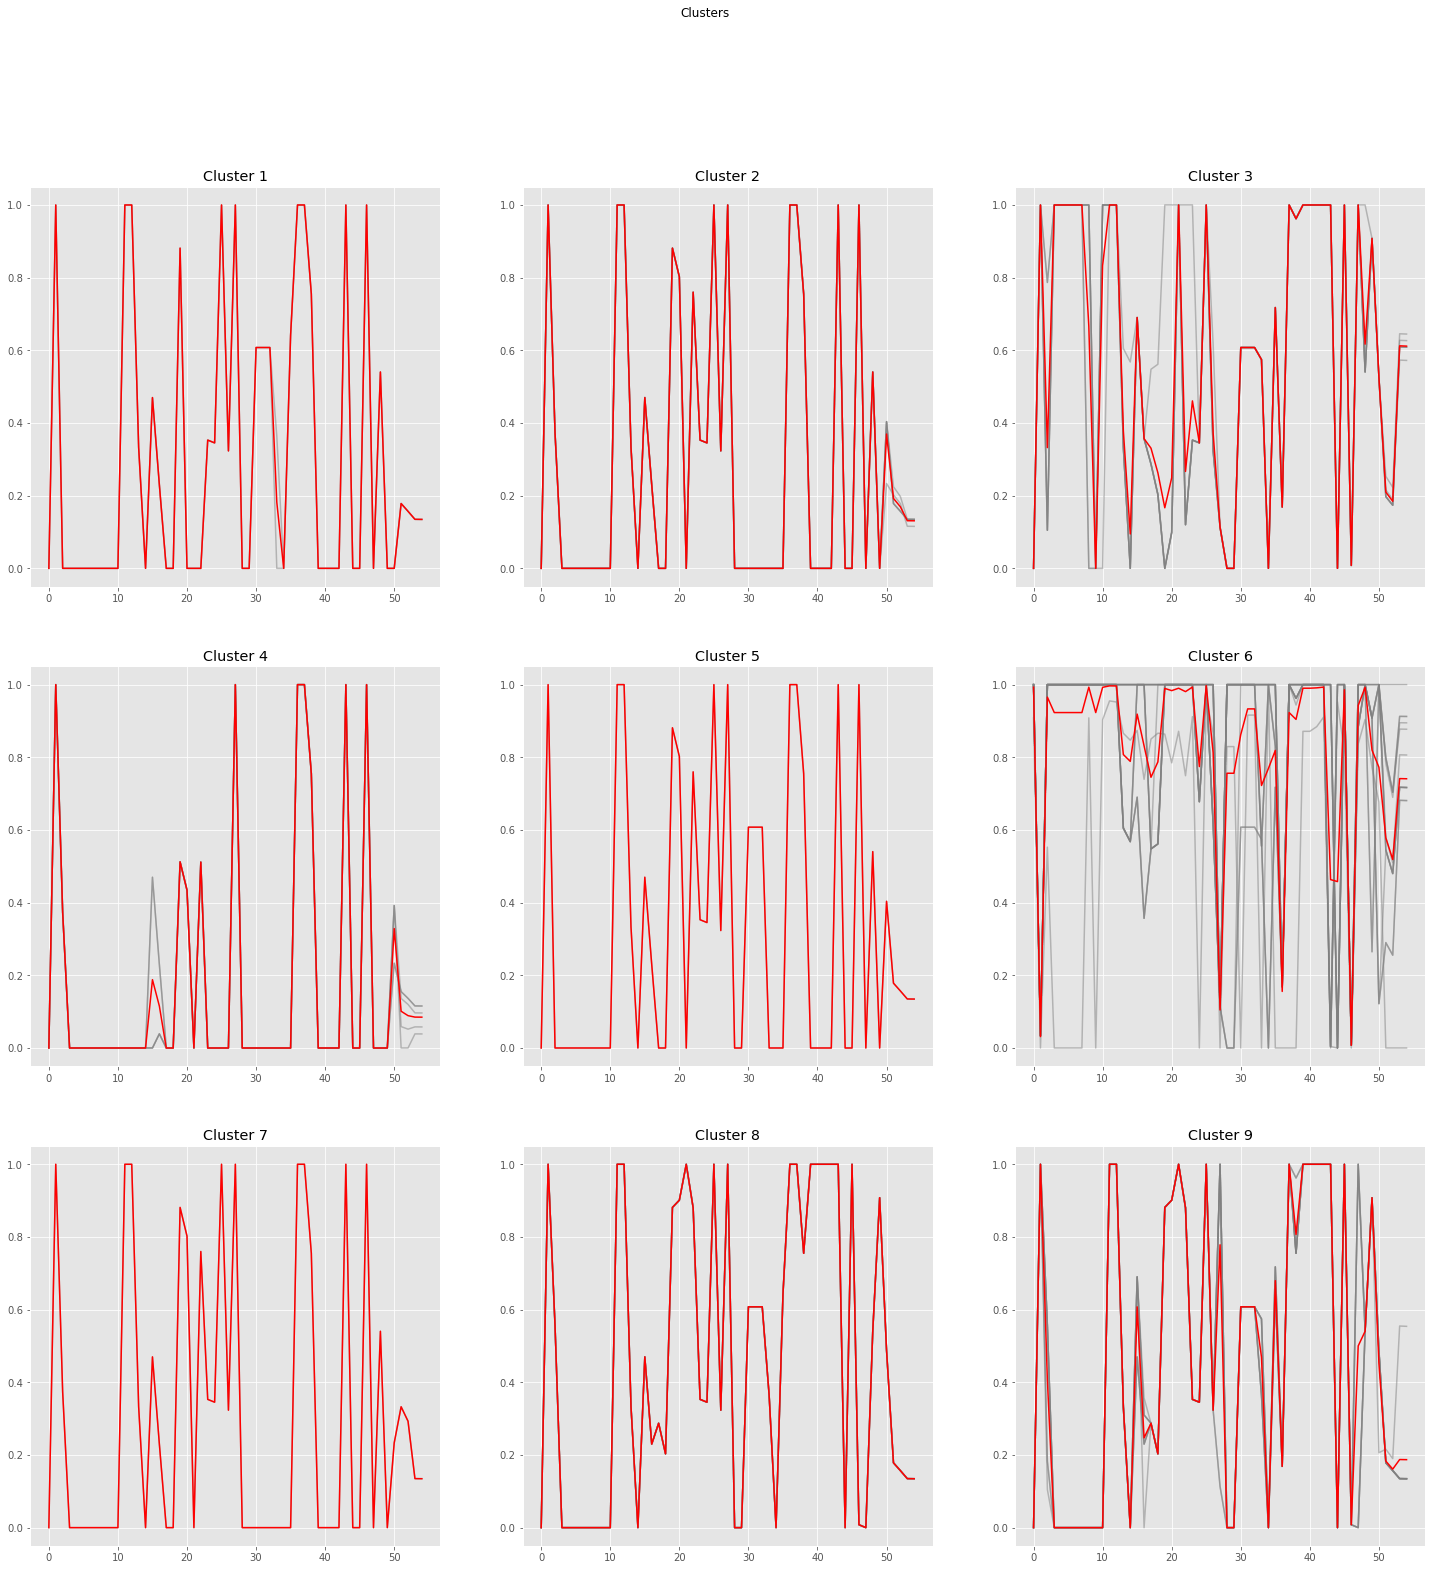

In [ ]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()
win_map = som.win_map(matriz_variacion_v1)
plot_som_series_averaged_center(som_x, som_y, win_map)

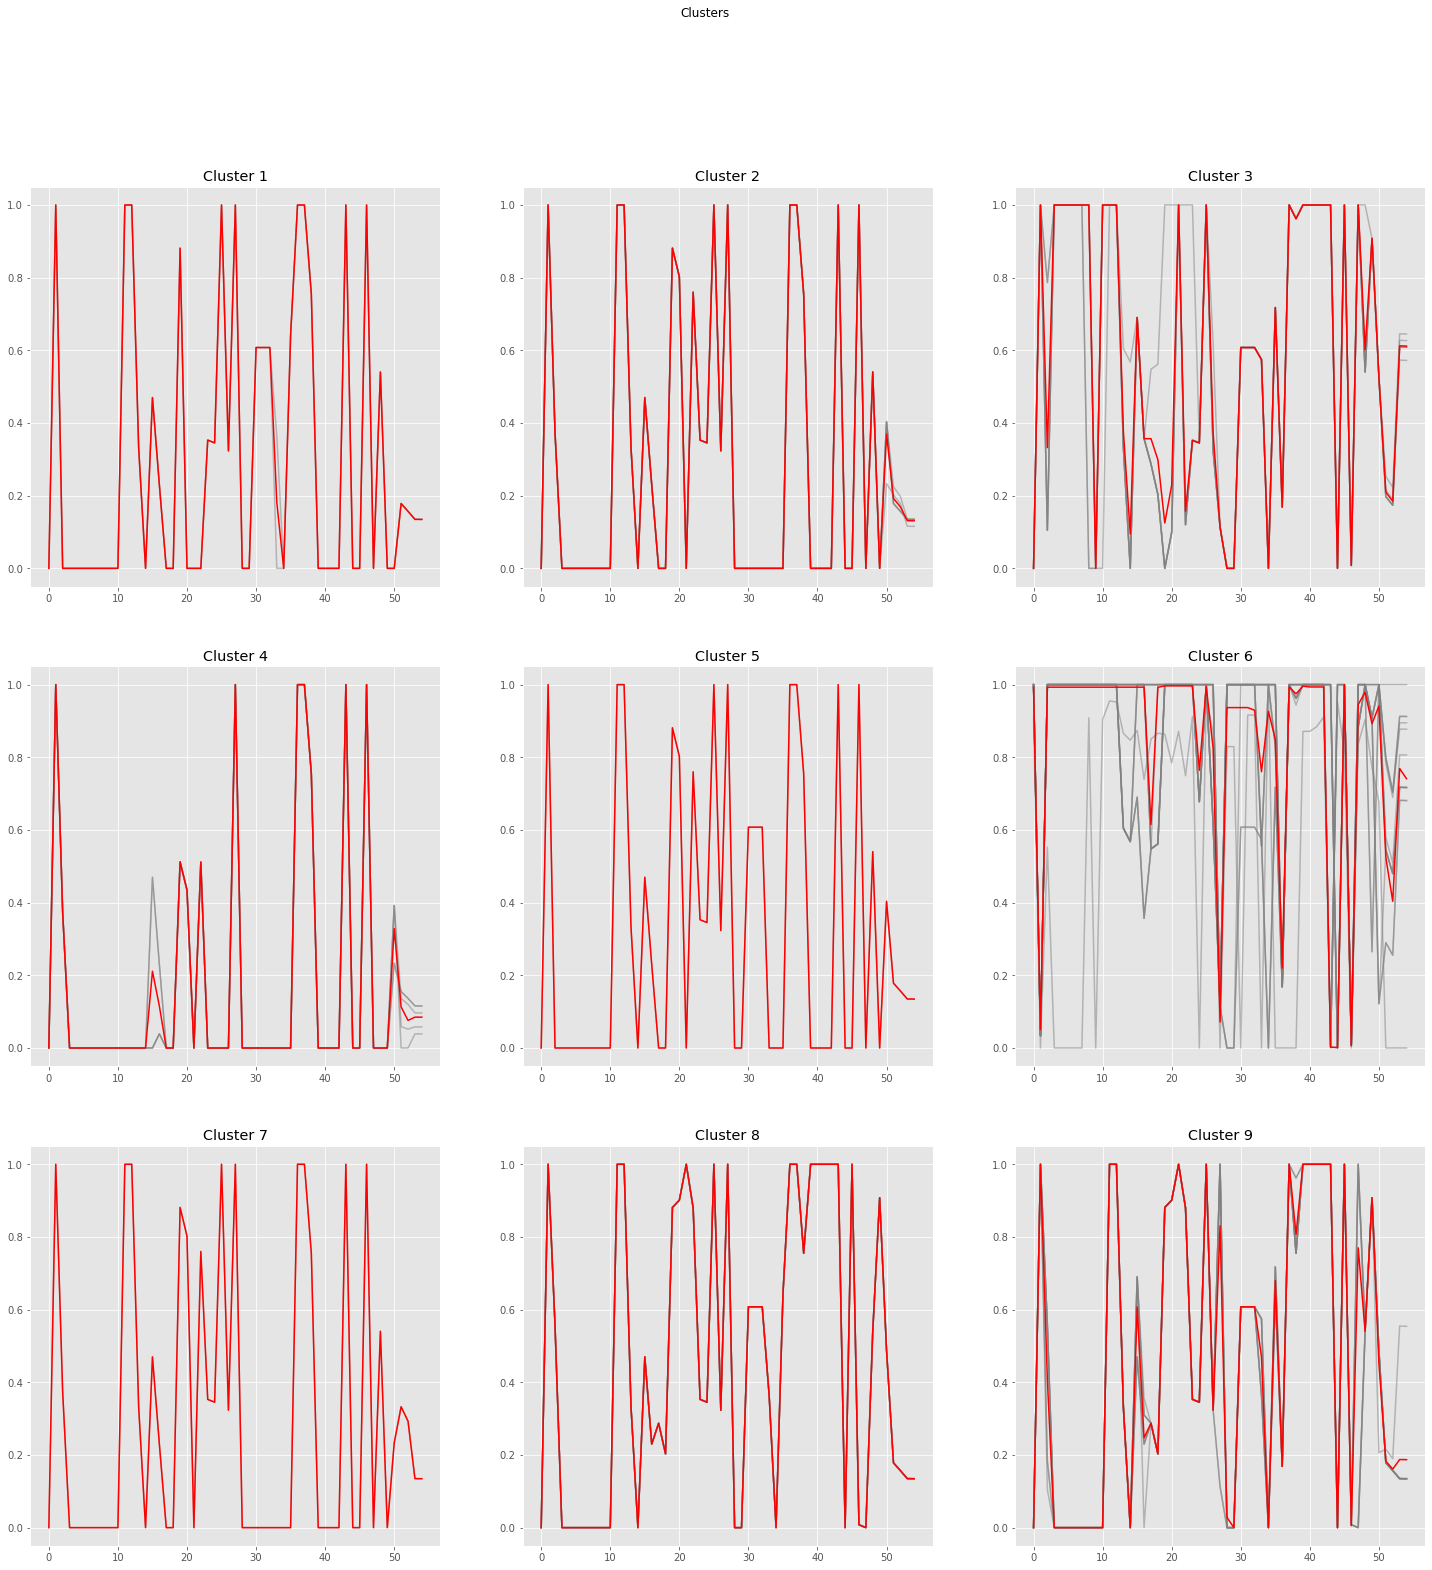

In [ ]:
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()
    
    win_map = som.win_map(matriz_variacion_v1)

plot_som_series_dba_center(som_x, som_y, win_map)

In [ ]:
# MODELADO PCA

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Se eligieron 14 valores luego de que se simulo con todos los valores posibles y se vio que se superaba el 98% con 14
modelo_pca = PCA(n_components=14)
datos=modelo_pca.fit_transform(matriz_variacion_v1)



In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
datos= pd.DataFrame(
    data    = datos,
    columns = ["PC"+str(x) for x in range(modelo_pca.components_.shape[0]) ]
    
)

In [ ]:
print(datos.shape)

print(datos.head())

(47, 14)
        PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0  1.134385 -0.498860 -1.506746  1.279426 -1.019746  2.098345  0.146968   
1 -3.038300 -1.156221  0.491892  0.999932  0.508846 -0.125413  0.004891   
2 -3.024869 -1.167416  0.489536  0.992929  0.508093 -0.150068 -0.008586   
3 -3.003888 -1.183778  0.488874  0.982335  0.507381 -0.185656 -0.028854   
4 -2.939904 -1.208319  0.472737  0.935570  0.443240 -0.164345  0.021360   

        PC7       PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.493048  0.234104 -0.129404 -0.034967  0.076123  0.029835  0.005061  
1  0.024141  0.084410  0.037866 -0.018109  0.068559  0.073444  0.038827  
2  0.037800  0.080040  0.037011 -0.018363  0.061009  0.042520  0.023011  
3  0.058472  0.073522  0.035725 -0.020576  0.050618 -0.002166 -0.002720  
4  0.124682  0.056524  0.014691 -0.001759 -0.050944 -0.042557 -0.035796  


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62693197 0.14559034 0.08936262 0.0336466  0.02721668 0.02163844
 0.01228289 0.01117382 0.01042731 0.00411522 0.0038467  0.00254769
 0.00226483 0.00186822]


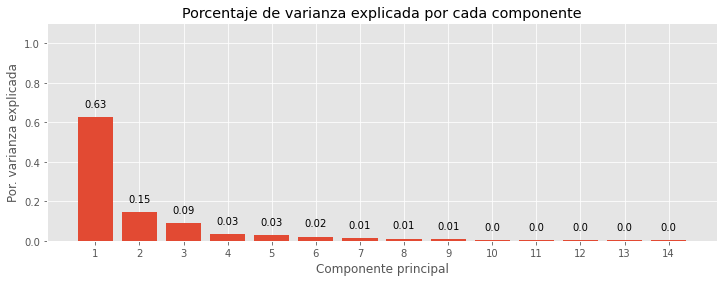

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
componente_principal=np.arange(modelo_pca.n_components_) + 1
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62693197 0.77252232 0.86188493 0.89553153 0.9227482  0.94438664
 0.95666953 0.96784334 0.97827066 0.98238588 0.98623257 0.98878026
 0.9910451  0.99291332]


In [ ]:

# Proyección de las observaciones de entrenamiento
# ==============================================================================

proyecciones = modelo_pca.transform(X=matriz_variacion_v1)

proyecciones = pd.DataFrame(
    proyecciones,
    columns = datos.columns ,
    index   = datos.index
)

proyecciones

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0   1.134385 -0.498860 -1.506746  1.279426 -1.019746  2.098345  0.146968   
1  -3.038300 -1.156221  0.491892  0.999932  0.508846 -0.125413  0.004891   
2  -3.024869 -1.167416  0.489536  0.992929  0.508093 -0.150068 -0.008586   
3  -3.003888 -1.183778  0.488874  0.982335  0.507381 -0.185656 -0.028854   
4  -2.939904 -1.208319  0.472737  0.935570  0.443240 -0.164345  0.021360   
5  -2.939904 -1.208319  0.472737  0.935570  0.443240 -0.164345  0.021360   
6  -2.479299 -0.980274 -0.184110 -0.694044 -0.083638  0.235202 -0.173479   
7  -2.455562 -1.002071 -0.193677 -0.707035 -0.085802  0.186397 -0.198703   
8  -2.456022 -0.992614 -0.198110 -0.672261 -0.101261  0.195975 -0.167386   
9  -2.462731 -0.985726 -0.193454 -0.668366 -0.100349  0.211660 -0.159749   
10 -2.462731 -0.985726 -0.193454 -0.668366 -0.100349  0.211660 -0.159749   
11 -2.462731 -0.985726 -0.193454 -0.668366 -0.100349  0.211660 -0.159749   
12 -2.257877 -0.832230 -0.269959 -0.732916 -0.395236 -0.033446  0.271185   
13 -2.294267 -0.757918  0.181617 -0.675074 -0.881033 -0.265124  0.454079   
14 -2.246783 -0.740637  0.181918 -0.671287 -0.899884 -0.343930  0.391884   
15 -0.758916  1.315603 -0.716266  0.002816  0.164858 -0.305670 -0.046283   
16 -0.758916  1.315603 -0.716266  0.002816  0.164858 -0.305670 -0.046283   
17 -0.758916  1.315603 -0.716266  0.002816  0.164858 -0.305670 -0.046283   
18 -0.758916  1.315603 -0.716266  0.002816  0.164858 -0.305670 -0.046283   
19 -0.758916  1.315603 -0.716266  0.002816  0.164858 -0.305670 -0.046283   
20 -0.758916  1.315603 -0.716266  0.002816  0.164858 -0.305670 -0.046283   
21 -0.634636  1.395825 -0.660566  0.089927  0.105339 -0.093041 -0.015725   
22 -0.634636  1.395825 -0.660566  0.089927  0.105339 -0.093041 -0.015725   
23 -0.634636  1.395825 -0.660566  0.089927  0.105339 -0.093041 -0.015725   
24 -0.602695  1.384861 -0.674809  0.080574  0.068579 -0.089006  0.015509   
25 -0.385556  1.431649 -0.484860  0.129396 -0.016260  0.130229  0.074224   
26 -0.426196  1.455161 -0.441367  0.127573 -0.139617  0.139262  0.103411   
27 -0.302730  1.453543 -0.247085  0.152133 -0.170843  0.352886  0.053402   
28 -0.181746  1.373879 -0.168167  0.075390 -0.197828  0.259746  0.003241   
29  0.696839  0.956208  1.776045  0.127165 -0.617717 -0.325549 -0.018475   
30  0.895224  0.843771  1.946833  0.141803 -0.596122 -0.123514 -0.028990   
31  1.083189  0.717305  2.049354  0.147773 -0.516412  0.098038 -0.028857   
32  1.083189  0.717305  2.049354  0.147773 -0.516412  0.098038 -0.028857   
33  1.162041  0.672059  1.973238  0.149177 -0.290653  0.077110 -0.085720   
34  1.659634  0.440947  0.927850 -0.412261  0.395882  0.470667 -0.529506   
35  2.179932 -0.088420  0.629199 -0.609661  1.092246  0.611990 -0.212448   
36  2.179932 -0.088420  0.629199 -0.609661  1.092246  0.611990 -0.212448   
37  2.384482 -0.046971  0.532739 -0.675417  0.977248  0.352797 -0.002164   
38  2.993622 -0.647913 -0.104974 -0.077318  0.346331 -0.076265  0.931099   
39  2.993622 -0.647913 -0.104974 -0.077318  0.346331 -0.076265  0.931099   
40  2.992913 -0.647840 -0.106469 -0.075754  0.344979 -0.072407  0.932009   
41  3.438960 -0.915036 -0.446966  0.029684 -0.026514 -0.253218  0.190952   
42  3.526241 -1.257244 -0.658183  0.172920 -0.340227 -0.385959 -0.417606   
43  3.528390 -1.257087 -0.653329  0.172395 -0.339542 -0.384840 -0.418403   
44  3.629514 -1.065060 -0.659845  0.219989 -0.280168 -0.370396 -0.373767   
45  3.629514 -1.065060 -0.659845  0.219989 -0.280168 -0.370396 -0.373767   
46  3.689571 -1.114981 -0.669993  0.188934 -0.283677 -0.480370 -0.434540   

         PC7       PC8       PC9      PC10      PC11      PC12      PC13  
0  -0.493048  0.234104 -0.129404 -0.034967  0.076123  0.029835  0.005061  
1   0.024141  0.084410  0.037866 -0.018109  0.068559  0.073444  0.038827  
2   0.037800  0.080040  0.037011 -0.018363  0.061009  0.042520  0.023011  
3   0.058472  0.073522  0.035725 -0.020576  0.050618 -0.0021

55

HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
2022-04-12                                             102.96    
2022-04-13                                             102.96    
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    
2022-04-25                                             102.96    
2022-04-26                                             102.96    
2022-04-27                                             102.96    
2022-04-28                                             102.96    
2022-04-30                                             102.96    
2022-05-01                                             102.96    
2022-05-02                                             102.96    
2022-05-05                                             102.96    
2022-05-07                                             102.96    
2022-05-12                                             102.96    
2022-05-13                                             102.96    
2022-05-14                                             102.96    
2022-05-15                                             102.96    
2022-05-16                                             102.96    
2022-05-17                                             102.96    
2022-05-20                                             102.96    
2022-05-21                                             102.96    
2022-05-23                                             102.96    
2022-05-24                                             102.96    
2022-05-25                                             102.96    
2022-05-26                                             102.96    
2022-05-27                                             102.96    
2022-06-01                                             102.96    
2022-06-01                                             102.96    
2022-06-02                                             102.96    
2022-06-02                                             102.96    
2022-06-03                                             102.96    
2022-06-03                                             102.96    
2022-06-04                                             102.96    
2022-06-05                                             102.96    
2022-06-06                                             102.96    
2022-06-06                                             102.96    
2022-06-08                                             102.96    
2022-06-08                                             102.96    
2022-06-10                                             113.36    
2022-06-10                                             113.36    
2022-06-11                                             113.36    
2022-06-14                                             113.36    
2022-06-14                                             113.36    
2022-06-17                                             113.36    
2022-06-18                                             113.36    
2022-06-20                                             113.36    
2022-06-24                                             113.36    
2022-06-24                                             113.36    
2022-06-28                                             113.36    
2022-06-28                                             113.36    
2022-06-30                                             113.36    
2022-06-30                                             113.36    
2022-07-01                                             113.36    
2022-07-02                                             113.36    
2022-07-04                                             113.36    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
2022-04-12                                         